In [1]:
#importing necessary libraries 
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OneHotEncoder
import nltk
#import spacy
import gensim
import tensorflow as tf
import keras
import nltk
# Additional libraries for specific tasks
import scipy
import statsmodels
import plotly
import networkx

2023-07-29 17:58:57.070171: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/anaconda/envs/Python3/lib:
2023-07-29 17:58:57.070208: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Read the CSV file
cb = pd.read_csv("/project/data/UCL_Export_Client_Briefs v3.csv")
cb.head()

,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,Pitch Feedback Form,...,Chemistry: How would you rate the quality of the team and service you received?,Overall: How likely would you be to recommend this agency to your network and colleagues?,Would you like to share any other project feedback to the agency?,Studiospace: How would you rate your overall experience of working with Studiospace?,Overall: How likely would be to recommend Studiospace to your network and colleagues?,Would you like to share any feedback to Studiospace?,Client Feedback,End date,Region,Reason for matching
0,Adivsor Messaging,Copywriting,Aviva,Opportunity Abandoned,Paul Bowman,NaN,17/5/2023,Reed Words,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Biffa Corporate Event Support,Spatial & Event Design,Biffa,1. Matching,Hannah Fraser,NaN,5/6/2023,"Innovate Live,Experience,The Park",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3 Yr OneApp UX/UI Deal,UX/UI Design,JLR,1. Matching,Hannah Fraser,NaN,1/8/2023,The Bang,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Project Trident,UX/UI Design,Phoenix,1. Matching,Peter Sayburn,NaN,29/5/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UX Design System,UX/UI Design,Phoenix,1. Matching,Peter Sayburn,NaN,12/6/2023,xDesign,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 22 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Brief                                                                                      194 non-null    object 
 1   Category                                                                                   177 non-null    object 
 2   Clients                                                                                    197 non-null    object 
 3   Status                                                                                     197 non-null    object 
 4   Lead                                                                                       197 non-null    object 
 5   Level of effort                                   

In [4]:
cb.describe()

,Quality: How would you rate the quality of delivery against your brief?,Value: How would you rate the agency in terms of value for money?,Chemistry: How would you rate the quality of the team and service you received?,Overall: How likely would you be to recommend this agency to your network and colleagues?,Studiospace: How would you rate your overall experience of working with Studiospace?,Overall: How likely would be to recommend Studiospace to your network and colleagues?,Reason for matching
count,31.000000,31.000000,31.000000,31.000000,25.000000,25.000000,0.0
mean,9.161290,9.161290,9.290323,9.032258,9.760000,9.760000,NaN
std,1.128325,1.213721,1.346441,1.870541,0.663325,0.663325,NaN
min,7.000000,6.000000,5.000000,3.000000,7.000000,7.000000,NaN
25%,9.000000,8.000000,9.000000,9.000000,10.000000,10.000000,NaN
50%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN
75%,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN


# "Lost" file data 

In [5]:
lost = pd.read_csv("/project/data/lost.csv")
lost

,Brief,Category,Clients,Status,Contact,Lead,Level of effort,Start date,Total Value,Commission,...,Dec Client Paid?,Agency final invoice,Jul-23 Actual,Aug-23 Actual,Sep-23 Actual,Oct-23 Actual,Nov-23 Actual,Dec-23 Actual,USD,id
0,PR agency,NaN,Outsized,Lost,Anurag Bhalla,Robin Scarborough,NaN,16/5/2022,NaN,15%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0,NaN
1,Aviva Funnel Conversion,NaN,Aviva,Lost,David Judic,Paul Bowman,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0,NaN
2,SEA PR agency (take 2),PR & Communications,Outsized,Lost,Sidni Shankarwar,Robin Scarborough,NaN,19/9/2022,"£20,000",15%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$24,000",NaN
3,Sustainability Copywriting - Extension,Copywriting,Oxford Properties,Lost,Matt Stephens,Paul Bowman,NaN,1/5/2023,"£5,000",15%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$6,000",NaN
4,Digital Marketing Campaign,Digital Marketing,Innovate UK,Lost,Chloe Emery,Phil Kohler,NaN,6/2/2023,"£83,000",15%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$99,600",NaN
5,Employer Value Proposition Creative Partner,Proposition Design,L&G,Lost,Josh Stevenson,Hannah Fraser,Low (1-5 hours),5/6/2023,"£30,000",15%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$36,000",NaN
6,Sustainable Home prototype\n,Software Development,Aviva,Lost,Simon Burckitt,Phil Kohler,NaN,14/11/2022,"£100,000",15%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$120,000",NaN
7,Shepper B2B Marketing,Digital Marketing,Shepper,Lost,David Tyers,Peter Sayburn,NaN,30/1/2023,"£150,000",10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$180,000",NaN
8,Rebrand & Research,Brand Strategy,British Sugar,Lost,Lucy Mcphee,Peter Sayburn,NaN,22/5/2023,"£78,000",15%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$93,600",NaN
9,Soho Blitz Day Media Support,Media Buying,Biffa,Lost,Karen Walker,Hannah Fraser,NaN,20/2/2023,"£50,000",5%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$60,000",NaN


In [6]:
lost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Columns: 199 entries, Brief to id
dtypes: float64(162), object(37)
memory usage: 26.6+ KB


In [7]:
# Get a list of all columns within the cb dataset
columns_list = cb.columns.tolist()

# Print the list of columns
print("Columns:", columns_list)

Columns: ['Brief', 'Category', 'Clients', 'Status', 'Lead', 'Level of effort', 'Start date', 'Shortlisted Agencies', 'Winning Agency', 'Pitch Feedback Form', 'Quality: How would you rate the quality of delivery against your brief?', 'Value: How would you rate the agency in terms of value for money?', 'Chemistry: How would you rate the quality of the team and service you received?', 'Overall: How likely would you be to recommend this agency to your network and colleagues?', 'Would you like to share any other project feedback to the agency?', 'Studiospace: How would you rate your overall experience of working with Studiospace?', 'Overall: How likely would be to recommend  Studiospace to your network and colleagues?', 'Would you like to share any feedback to Studiospace?', 'Client Feedback', 'End date', 'Region', 'Reason for matching']


In [8]:
# Get a list of all columns within the cb dataset
columns_list1 = lost.columns.tolist()

# Print the list of columns
print("Columns:", columns_list1)

Columns: ['Brief', 'Category', 'Clients', 'Status', 'Contact', 'Lead', 'Level of effort', 'Start date', 'Total Value', 'Commission', 'Current Situation', 'Next Steps', 'Client team', 'Shortlisted Agencies', 'Reason for matching', 'Pitch Feedback Forms', 'Winning Agency', 'Pitch Feedback Form', 'Sold', 'PO ID', 'PO ID copy', 'PO Number', 'PO Number copy', 'PO number 2', 'Count (👨\u200d💻  Client Briefs) (from PO number 2)', 'Agency Project Feedback Form (for client to fill out)', 'Client Project Feedback Form (for agency to fill out)', 'Agency SOW', 'Jan Agency Invoice Date', 'Jan Agency Invoice Amount', 'Jan Agency Invoice Paid?', 'Feb Agency Invoice Date', 'Feb Agency Invoice Amount', 'Feb Agency Invoice Paid?', 'March Agency Invoice Date', 'March Agency Invoice Amount', 'March Agency Invoice Paid?', 'April Agency Invoice Date', 'April Agency Invoice Amount', 'April Agency Invoice Paid?', 'May Agency Invoice Date', 'May Agency Invoice Amount', 'May Agency Invoice Paid?', 'June Agency I

In [9]:
# List of column names to keep
columns_to_keep = ['Brief', 'Category', 'Clients', 'Status', 'Lead',
                   'Level of effort', 'Start date', 'Shortlisted Agencies', 
                   'Winning Agency', 'Pitch Feedback Form', 
                   'Quality: How would you rate the quality of delivery against your brief?', 
                   'Value: How would you rate the agency in terms of value for money?',
                   'Chemistry: How would you rate the quality of the team and service you received?',
                   'Overall: How likely would you be to recommend this agency to your network and colleagues?',
                   'Would you like to share any other project feedback to the agency?', 
                   'Studiospace: How would you rate your overall experience of working with Studiospace?', 
                   'Overall: How likely would be to recommend  Studiospace to your network and colleagues?',
                   'Would you like to share any feedback to Studiospace?', 
                   'Client Feedback', 'End date',
                   'Region', 'Reason for matching']

# Keep only the specified columns
lost= lost[columns_to_keep]

# Print the filtered dataset
lost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Brief                                                                                      17 non-null     object 
 1   Category                                                                                   12 non-null     object 
 2   Clients                                                                                    17 non-null     object 
 3   Status                                                                                     17 non-null     object 
 4   Lead                                                                                       17 non-null     object 
 5   Level of effort                                     

In [10]:
#concat function -- adding all rows from lost to cb 
if set(lost.columns) == set(cb.columns):
    cb = pd.concat([cb, lost])
    # Further operations on the merged dataset
    print("Rows from 'lost' added to 'cb'.")
else:
    print("Column headers are different. Rows not added.")

Rows from 'lost' added to 'cb'.


## rows from the lost file successfully added to the main file 

In [11]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 16
Data columns (total 22 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Brief                                                                                      211 non-null    object 
 1   Category                                                                                   189 non-null    object 
 2   Clients                                                                                    214 non-null    object 
 3   Status                                                                                     214 non-null    object 
 4   Lead                                                                                       214 non-null    object 
 5   Level of effort                                    

In [12]:
#unique column names for shortlisted agencies 
cb['Shortlisted Agencies'].unique()

array(['Reed Words', 'Innovate Live,Experience,The Park', 'The Bang',
       'xDesign,Shoreditch Design Studio', 'xDesign', nan,
       'Cocogun,Houston Group,Principals', 'Good Innovation,UNPITCHD',
       'Oxara London,Secret Source Marketing',
       'I-AM,Manifest Group,Daughter Studio', 'VERSA AGENCY',
       'Shoreditch Design Studio,OHMY,Solace Digital',
       'Shoreditch Design Studio,Hatch Films CIC,Josephmark',
       'Three Whiskey,Croud', 'GH05T Ltd.',
       '2CV,The Nursery Research & Planning Ltd', 'Nimbletank', 'Ampel',
       'Launch Studio,Frontier,Fun Agency Ltd',
       '2CV,Verve,Flume,The Nursery Research & Planning Ltd', 'NMD+',
       'PALO IT', 'Matic Digital,Josephmark', 'Shoreditch Design Studio',
       'Hedgehog Lab,xDesign', 'SAND visuals,Shoreditch Design Studio',
       'GH05T Ltd.,Buddy Media', 'Innovate Live',
       'Blue Feathers,Daughter Studio,CreateFuture',
       'Boost Awards,Reed Words', 'Akcelo,SLIK,Future Friendly,Tobias',
       'How To Imp

In [13]:
print(cb["Shortlisted Agencies"].value_counts())

Buddy Media                                            9
Path Ventures                                          7
Shoreditch Design Studio                               7
Reed Words                                             5
Innovate Live                                          5
                                                      ..
Shoreditch Design Studio,Akcelo,xDesign                1
Reed Words,infogr8 Ltd,Catch the Sun Communications    1
How To Impact,IE                                       1
Houston Group                                          1
xDesign,UNPITCHD                                       1
Name: Shortlisted Agencies, Length: 113, dtype: int64


In [14]:
print(cb["Winning Agency"].value_counts())

Shoreditch Design Studio           12
Buddy Media                         8
Path Ventures                       7
GH05T Ltd.                          7
NMD+                                6
Reed Words                          6
Innovate Live                       5
Hedgehog Lab                        4
Studiospace                         3
PALO IT                             3
Viewpoint Studios                   3
Raw.Studio                          3
Good Innovation                     3
Sketch & Co                         3
In Marketing We Trust               2
Orange Panther Collective           2
Apex1                               2
UNPITCHD                            2
Wonderful                           2
Houston Group                       2
How To Impact                       2
Quill Peak Consulting               2
Daughter Studio                     2
The Bang                            2
Nimbletank                          2
Tobias                              1
Inc         

In [15]:
print(cb["Category"].value_counts())

UX/UI Design              37
Social & Content          23
Proposition Design        17
Creative & Production     15
Strategic Design          14
Brand Strategy            12
Software Development      11
Research & Insight        10
Spatial & Event Design     8
Copywriting                7
Video                      5
Media Buying               5
Digital Marketing          4
Marketing Planning         3
PR & Communications        3
CRM & Loyalty              3
SEO & PPC                  2
Training                   2
CX Journey                 2
Photography                2
Business Consultancy       2
Visualisation              2
Name: Category, dtype: int64


In [16]:
# Group by category and winning agency, and count the occurrences
agency_counts = cb.groupby(["Category", "Winning Agency"]).size()

# Convert the resulting Series to a DataFrame and reset the index
agency_counts = agency_counts.reset_index(name='count')

# Display the table
print(agency_counts)

          Category            Winning Agency  count
0   Brand Strategy           Daughter Studio      1
1   Brand Strategy             Houston Group      2
2   Brand Strategy             Innovate Live      2
3   Brand Strategy                      NMD+      1
4   Brand Strategy                Rip + Tear      1
..             ...                       ...    ...
73    UX/UI Design                 Wonderful      1
74    UX/UI Design                off brand.      1
75    UX/UI Design                   xDesign      1
76           Video  Shoreditch Design Studio      1
77   Visualisation  Shoreditch Design Studio      1

[78 rows x 3 columns]


In [17]:
# Pivot the DataFrame to create a table
agency_table = agency_counts.pivot(index='Category',
                                   columns='Winning Agency', values='count')

# Fill missing values with 0
agency_table = agency_table.fillna(0)

#print
print(agency_table)

Winning Agency          Ampel  Apex1  Blicx  Blue Feathers  Boost Awards  \
Category                                                                   
Brand Strategy            0.0    0.0    0.0            0.0           0.0   
Business Consultancy      0.0    0.0    0.0            1.0           0.0   
CRM & Loyalty             0.0    0.0    0.0            0.0           0.0   
CX Journey                0.0    0.0    0.0            0.0           0.0   
Copywriting               0.0    0.0    0.0            0.0           0.0   
Creative & Production     1.0    0.0    0.0            0.0           0.0   
Digital Marketing         0.0    0.0    0.0            0.0           0.0   
Marketing Planning        0.0    0.0    0.0            0.0           0.0   
Media Buying              0.0    0.0    0.0            0.0           0.0   
PR & Communications       0.0    0.0    0.0            0.0           1.0   
Photography               0.0    0.0    0.0            0.0           0.0   
Proposition 

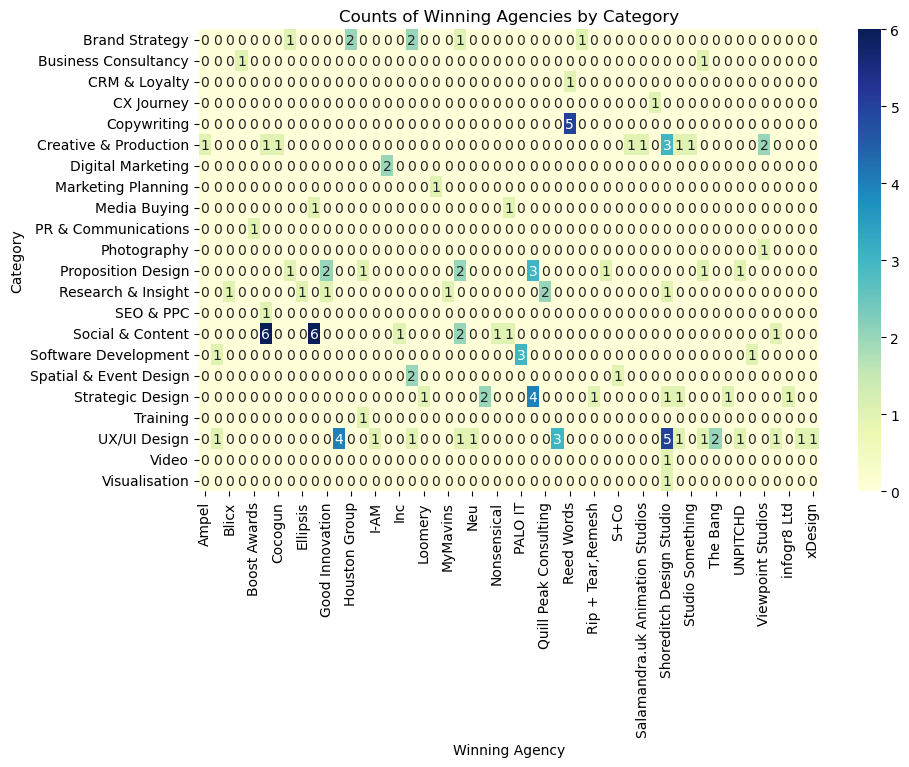

In [18]:
# Group by category and winning agency, and count the occurrences
agency_counts = cb.groupby(["Category", "Winning Agency"]).size().reset_index(name='count')

# Pivot the DataFrame to create a table
table = agency_counts.pivot(index='Category', columns='Winning Agency', values='count')

# Fill missing values with 0
table = table.fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(table, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Counts of Winning Agencies by Category")
plt.xlabel("Winning Agency")
plt.ylabel("Category")
plt.show()

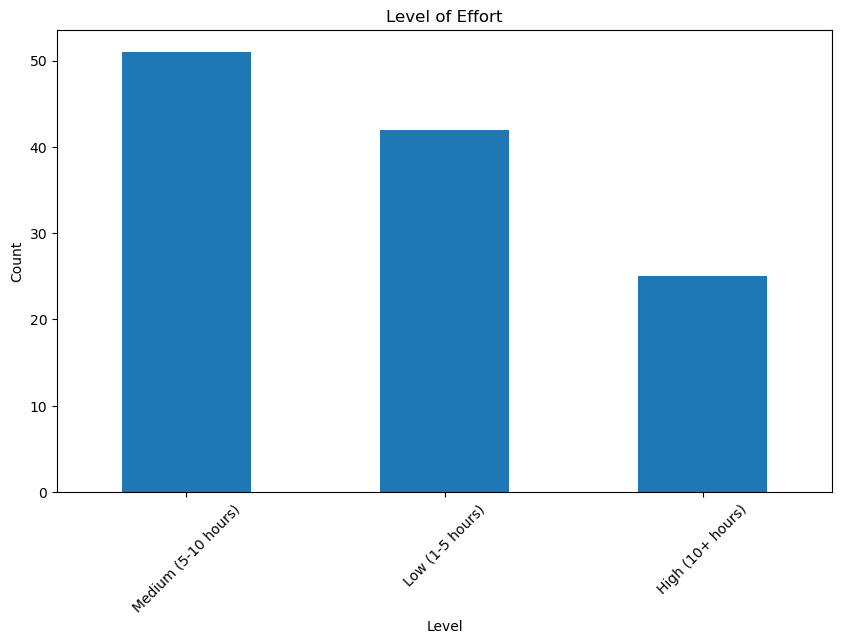

In [19]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
cb["Level of effort"].value_counts().plot(kind='bar')
plt.title('Level of Effort')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [20]:
cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 16
Data columns (total 22 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Brief                                                                                      211 non-null    object 
 1   Category                                                                                   189 non-null    object 
 2   Clients                                                                                    214 non-null    object 
 3   Status                                                                                     214 non-null    object 
 4   Lead                                                                                       214 non-null    object 
 5   Level of effort                                    

## filling all NaNs for "Level of effort" as "unknown"
## reason: ensuring feature selection through a modle for more data-driven decision-making and learning 

In [21]:
# filling all NaNs for "Level of effort" as "unknown"
cb["Level of effort"] = cb["Level of effort"].fillna("unknown")
cb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 0 to 16
Data columns (total 22 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Brief                                                                                      211 non-null    object 
 1   Category                                                                                   189 non-null    object 
 2   Clients                                                                                    214 non-null    object 
 3   Status                                                                                     214 non-null    object 
 4   Lead                                                                                       214 non-null    object 
 5   Level of effort                                    

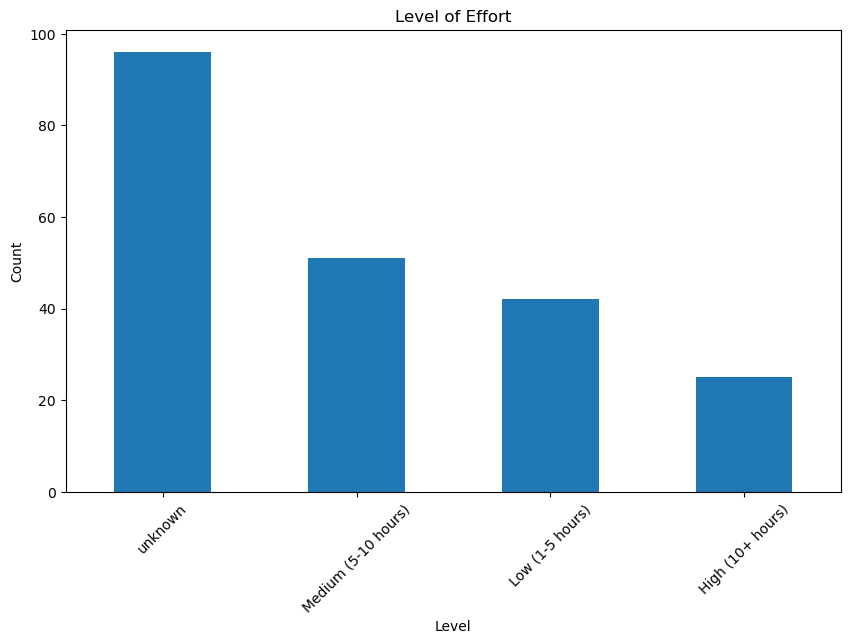

In [22]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
cb["Level of effort"].value_counts().plot(kind='bar')
plt.title('Level of Effort')
plt.xlabel('Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Status of Brief 

In [23]:
#checking for all value counts 
print(cb["Status"].value_counts())

5. Archived              74
Opportunity Abandoned    43
3. Started               33
Brief Abandoned          17
Lost                     17
1. Matching              16
2. Contracting            9
4. Finished               5
Name: Status, dtype: int64


### removing only opportunity abandoned

(changed in v3 after discussing with the team)

LEAVES US WITH 171 of 214

In [24]:
#new dataframe with filtered data
cb1 = cb[~cb["Status"].isin(["Opportunity Abandoned"])].reset_index(drop=True)
cb1

,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,Pitch Feedback Form,...,Chemistry: How would you rate the quality of the team and service you received?,Overall: How likely would you be to recommend this agency to your network and colleagues?,Would you like to share any other project feedback to the agency?,Studiospace: How would you rate your overall experience of working with Studiospace?,Overall: How likely would be to recommend Studiospace to your network and colleagues?,Would you like to share any feedback to Studiospace?,Client Feedback,End date,Region,Reason for matching
0,Biffa Corporate Event Support,Spatial & Event Design,Biffa,1. Matching,Hannah Fraser,unknown,5/6/2023,"Innovate Live,Experience,The Park",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3 Yr OneApp UX/UI Deal,UX/UI Design,JLR,1. Matching,Hannah Fraser,unknown,1/8/2023,The Bang,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Project Trident,UX/UI Design,Phoenix,1. Matching,Peter Sayburn,unknown,29/5/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UX Design System,UX/UI Design,Phoenix,1. Matching,Peter Sayburn,unknown,12/6/2023,xDesign,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brand Refresh,Brand Strategy,Auspaynet,1. Matching,Kate Walker,unknown,3/7/2023,"Cocogun,Houston Group,Principals",Houston Group,"Amelia Pridham (and team),Amelia Pridham (and ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Call centre automation,NaN,CFS,Lost,Robin Scarborough,unknown,27/6/2022,VERSA AGENCY,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AUS,NaN
167,Electrification Qual Research,Proposition Design,JLR,Lost,Hannah Fraser,unknown,5/12/2022,"Verve,2CV",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,UX Design System,UX/UI Design,Phoenix,Lost,Peter Sayburn,unknown,19/6/2023,xDesign,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,Project Trident,UX/UI Design,Phoenix,Lost,Peter Sayburn,unknown,5/6/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print(cb1["Status"].value_counts())

5. Archived        74
3. Started         33
Brief Abandoned    17
Lost               17
1. Matching        16
2. Contracting      9
4. Finished         5
Name: Status, dtype: int64


In [26]:
#fixing for values appearing with sr. no. 
status_mapping = {
    "1. Matching": "Matching",
    "2. Contracting": "Contracting",
    "3. Started": "Started",
    "4. Finished": "Finished",
    "5. Archived": "Archived"
}

cb1["Status"] = cb1["Status"].replace(status_mapping)
print(cb1["Status"].value_counts())

Archived           74
Started            33
Brief Abandoned    17
Lost               17
Matching           16
Contracting         9
Finished            5
Name: Status, dtype: int64


In [27]:
cb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 22 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Brief                                                                                      171 non-null    object 
 1   Category                                                                                   165 non-null    object 
 2   Clients                                                                                    171 non-null    object 
 3   Status                                                                                     171 non-null    object 
 4   Lead                                                                                       171 non-null    object 
 5   Level of effort                                   

### Lead Column 

In [28]:
print(cb1["Lead"].value_counts())

Paul Bowman          43
Robin Scarborough    36
Peter Sayburn        27
Hannah Fraser        22
Phil Kohler          21
Kate Walker          10
Gideon Hyde           9
George Patten         2
David Cowser          1
Name: Lead, dtype: int64


In [29]:
cb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 22 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Brief                                                                                      171 non-null    object 
 1   Category                                                                                   165 non-null    object 
 2   Clients                                                                                    171 non-null    object 
 3   Status                                                                                     171 non-null    object 
 4   Lead                                                                                       171 non-null    object 
 5   Level of effort                                   

# gaps in data

In [30]:
#creating a subset of the data with only to look at the relevant columns to explore
cb2 = cb1[["Brief", "Category", "Clients", 
                "Status", "Lead","Level of effort", "Start date",
                "Shortlisted Agencies", "Winning Agency", "End date", "Region"]]
cb2.head()

,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region
0,Biffa Corporate Event Support,Spatial & Event Design,Biffa,Matching,Hannah Fraser,unknown,5/6/2023,"Innovate Live,Experience,The Park",NaN,NaN,NaN
1,3 Yr OneApp UX/UI Deal,UX/UI Design,JLR,Matching,Hannah Fraser,unknown,1/8/2023,The Bang,NaN,NaN,NaN
2,Project Trident,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,29/5/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,NaN
3,UX Design System,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,12/6/2023,xDesign,NaN,NaN,NaN
4,Brand Refresh,Brand Strategy,Auspaynet,Matching,Kate Walker,unknown,3/7/2023,"Cocogun,Houston Group,Principals",Houston Group,NaN,AUS


In [31]:
cb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brief                 171 non-null    object
 1   Category              165 non-null    object
 2   Clients               171 non-null    object
 3   Status                171 non-null    object
 4   Lead                  171 non-null    object
 5   Level of effort       171 non-null    object
 6   Start date            164 non-null    object
 7   Shortlisted Agencies  155 non-null    object
 8   Winning Agency        121 non-null    object
 9   End date              64 non-null     object
 10  Region                137 non-null    object
dtypes: object(11)
memory usage: 14.8+ KB


## checking for NaNs in SAs and WAs

### for Shortlisted Agencies

In [32]:
#checking for nan values for "shortlisted agencies" since entire premise based on this 
is_nan_sa = cb2['Shortlisted Agencies'].isnull()

# Printing rows with NaN values in the 'Shortlisted Agencies' column
nan_rows = cb2[is_nan_sa]

# Get the number of NaN rows
num_nan_rows = is_nan_sa.sum()
print("Number of NaN rows, that is, no value/data for 'Shortlisted Agencies' column:", num_nan_rows)

nan_rows

Number of NaN rows, that is, no value/data for 'Shortlisted Agencies' column: 16


,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region
27,Expert Videos x5 Bristol,Creative & Production,Aviva,Started,Paul Bowman,Low (1-5 hours),8/2/2023,NaN,Viewpoint Studios,14/4/2023,UK
55,Social Media support,Social & Content,Veezu,Started,Paul Bowman,Medium (5-10 hours),29/3/2023,NaN,GH05T Ltd.,31/5/2023,UK
60,Escape Travel eDM Build,CRM & Loyalty,News Corp (Aus),Finished,Kate Walker,Medium (5-10 hours),4/10/2022,NaN,NaN,NaN,AUS
63,Brand Refresh - case for change (Consulting),Brand Strategy,Auspaynet,Archived,Kate Walker,High (10+ hours),4/7/2022,NaN,NaN,NaN,AUS
94,Brand Escape Room Production,Brand Strategy,Aviva,Archived,Paul Bowman,Low (1-5 hours),23/1/2023,NaN,Innovate Live,23/2/2023,UK
114,Strat Roadmap,Business Consultancy,Leaders Romans,Archived,Gideon Hyde,High (10+ hours),1/2/2022,NaN,Studiospace,NaN,UK
120,Cover Sense ph2 (UX),UX/UI Design,TAL,Archived,Robin Scarborough,Medium (5-10 hours),1/2/2022,NaN,Studiospace,NaN,AUS
137,Onboarding and servicing portal\n,Software Development,Cuscal,Brief Abandoned,Robin Scarborough,unknown,NaN,NaN,NaN,NaN,NaN
138,CDR consent journeys\n,NaN,Cuscal,Brief Abandoned,Robin Scarborough,unknown,NaN,NaN,NaN,NaN,NaN
139,FIFA website,UX/UI Design,Gala Games,Brief Abandoned,Gideon Hyde,unknown,31/10/2022,NaN,NaN,NaN,UK


### By the logic that:
1. "Opportunity Abandoned" - if we abandoned an A, B or C opportunity: didn't become an actual brief so irrelevant for 'bad matches'. Hence rows with these string values were dropped. 

2. "Brief Abandoned" - if we abandoned an actual brief that a client sent: relevant for bad matches if it has agencies attached

3. "Lost" - if a brief is lost due to agencies outside of StudioSpace winning a pitch or client decided not to move forward: relevant for bad matches if it has agencies attached

In [34]:
# Save the table with missing rows to a CSV file
# nan_rows.to_csv('missing_rows.csv', index=False)

### dropping all NaNs for SAs from the df

In [33]:
# Cheking for instacnes before NaNs in shortlisted agencies was dropped 
num_rows_with_nan = len(cb2)
print("Number of rows before dropping NaN values:", num_rows_with_nan)

# Dropping rows with NaN values in 'Shortlisted Agencies' column
cb2= cb2.dropna(subset=['Shortlisted Agencies'])

# Check the number of rows after dropping NaN values
num_rows_without_nan = len(cb2)
print("Number of rows after dropping NaN values:", num_rows_without_nan)

Number of rows before dropping NaN values: 171
Number of rows after dropping NaN values: 155


the missing data file was downloaded with necessary missing values filled.

file was re uploaded and then added to the original dataset cb2.

In [34]:
# Read the modified CSV file with filled values
filled_rows = pd.read_csv('/project/ss correction files/missing_rows_c.csv')
filled_rows

,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region
0,Expert Videos x5 Bristol,Creative & Production,Aviva,Started,Paul Bowman,Low (1-5 hours),08/02/2023,Viewpoint Studios,Viewpoint Studios,14/04/2023,UK
1,Social Media support,Social & Content,Veezu,Started,Paul Bowman,Medium (5-10 hours),29/03/2023,GH05T Ltd.,GH05T Ltd.,31/05/2023,UK
2,Escape Travel eDM Build,CRM & Loyalty,News Corp (Aus),Finished,Kate Walker,Medium (5-10 hours),04/10/2022,Apparent,NaN,NaN,AUS
3,Brand Refresh - case for change (Consulting),Brand Strategy,Auspaynet,Archived,Kate Walker,High (10+ hours),04/07/2022,NaN,NaN,NaN,AUS
4,Brand Escape Room Production,Brand Strategy,Aviva,Archived,Paul Bowman,Low (1-5 hours),23/01/2023,Innovate Live,Innovate Live,23/02/2023,UK
5,Strat Roadmap,Business Consultancy,Leaders Romans,Archived,Gideon Hyde,High (10+ hours),01/02/2022,NaN,Studiospace,NaN,UK
6,Cover Sense ph2 (UX),UX/UI Design,TAL,Archived,Robin Scarborough,Medium (5-10 hours),01/02/2022,CS UX,Studiospace,NaN,AUS
7,Onboarding and servicing portal\n,Software Development,Cuscal,Brief Abandoned,Robin Scarborough,NaN,NaN,NaN,NaN,NaN,NaN
8,CDR consent journeys\n,NaN,Cuscal,Brief Abandoned,Robin Scarborough,NaN,NaN,NaN,NaN,NaN,NaN
9,FIFA website,UX/UI Design,Gala Games,Brief Abandoned,Gideon Hyde,NaN,31/10/2022,"Studiomade, Shoreditch Design Studio, Off Brand",NaN,NaN,UK


In [35]:
# # Concatenate the filled rows with the original dataset
cb2 = pd.concat([cb2, filled_rows], ignore_index=True)
cb2

,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region
0,Biffa Corporate Event Support,Spatial & Event Design,Biffa,Matching,Hannah Fraser,unknown,5/6/2023,"Innovate Live,Experience,The Park",NaN,NaN,NaN
1,3 Yr OneApp UX/UI Deal,UX/UI Design,JLR,Matching,Hannah Fraser,unknown,1/8/2023,The Bang,NaN,NaN,NaN
2,Project Trident,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,29/5/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,NaN
3,UX Design System,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,12/6/2023,xDesign,NaN,NaN,NaN
4,Brand Refresh,Brand Strategy,Auspaynet,Matching,Kate Walker,unknown,3/7/2023,"Cocogun,Houston Group,Principals",Houston Group,NaN,AUS
...,...,...,...,...,...,...,...,...,...,...,...
166,New dairy food brand,Brand Strategy,Kerry,Brief Abandoned,Peter Sayburn,NaN,13/03/2023,NaN,NaN,NaN,UK
167,PR agency,NaN,Outsized,Lost,Robin Scarborough,NaN,16/05/2022,NaN,NaN,NaN,AUS
168,Aviva Funnel Conversion,NaN,Aviva,Lost,Paul Bowman,NaN,NaN,NaN,NaN,NaN,UK
169,SEA PR agency (take 2),PR & Communications,Outsized,Lost,Robin Scarborough,NaN,19/09/2022,NaN,NaN,NaN,AUS


### checking for NaNs again, if there are still, we drop

In [36]:
#checking for nan values for "shortlisted agencies" since entire premise based on this 
is_nan_sa = cb2['Shortlisted Agencies'].isnull()

# Printing rows with NaN values in the 'Shortlisted Agencies' column
nan_rows = cb2[is_nan_sa]

# Get the number of NaN rows
num_nan_rows = is_nan_sa.sum()

print("Number of NaN rows, that is, no value/data for 'Shortlisted Agencies' column:", num_nan_rows)

nan_rows

Number of NaN rows, that is, no value/data for 'Shortlisted Agencies' column: 9


,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region
158,Brand Refresh - case for change (Consulting),Brand Strategy,Auspaynet,Archived,Kate Walker,High (10+ hours),04/07/2022,NaN,NaN,NaN,AUS
160,Strat Roadmap,Business Consultancy,Leaders Romans,Archived,Gideon Hyde,High (10+ hours),01/02/2022,NaN,Studiospace,NaN,UK
162,Onboarding and servicing portal\n,Software Development,Cuscal,Brief Abandoned,Robin Scarborough,NaN,NaN,NaN,NaN,NaN,NaN
163,CDR consent journeys\n,NaN,Cuscal,Brief Abandoned,Robin Scarborough,NaN,NaN,NaN,NaN,NaN,NaN
165,Research platform,Research & Insight,JLR,Brief Abandoned,Hannah Fraser,NaN,05/09/2022,NaN,NaN,NaN,UK
166,New dairy food brand,Brand Strategy,Kerry,Brief Abandoned,Peter Sayburn,NaN,13/03/2023,NaN,NaN,NaN,UK
167,PR agency,NaN,Outsized,Lost,Robin Scarborough,NaN,16/05/2022,NaN,NaN,NaN,AUS
168,Aviva Funnel Conversion,NaN,Aviva,Lost,Paul Bowman,NaN,NaN,NaN,NaN,NaN,UK
169,SEA PR agency (take 2),PR & Communications,Outsized,Lost,Robin Scarborough,NaN,19/09/2022,NaN,NaN,NaN,AUS


since there are 9 NaNs within the SAs, we now drop these.

In [37]:
### dropping all NaNs for SAs from the df

# Cheking for instacnes before NaNs in shortlisted agencies was dropped 
num_rows_with_nan = len(cb2)
print("Number of instances before dropping NaN values:", num_rows_with_nan)

# Dropping rows with NaN values in 'Shortlisted Agencies' column
cb2= cb2.dropna(subset=['Shortlisted Agencies'])

# Check the number of rows after dropping NaN values
num_rows_without_nan = len(cb2)
print("Number of instances after dropping NaN values:", num_rows_without_nan)

Number of instances before dropping NaN values: 171
Number of instances after dropping NaN values: 162


In [38]:
cb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 170
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brief                 162 non-null    object
 1   Category              159 non-null    object
 2   Clients               162 non-null    object
 3   Status                162 non-null    object
 4   Lead                  162 non-null    object
 5   Level of effort       160 non-null    object
 6   Start date            158 non-null    object
 7   Shortlisted Agencies  162 non-null    object
 8   Winning Agency        120 non-null    object
 9   End date              64 non-null     object
 10  Region                130 non-null    object
dtypes: object(11)
memory usage: 15.2+ KB


In [40]:
#Category
is_nan_category = cb2['Category'].isnull()

# Printing rows with NaN values in the 'Shortlisted Agencies' column
nan_rows_c = cb2[is_nan_category]

# Get the number of NaN rows
num_nan_rows_c = is_nan_category.sum()

print("Number of NaN rows, that is, no value/data for 'Category' column:", num_nan_rows_c)

nan_rows_c

Number of NaN rows, that is, no value/data for 'Category' column: 3


,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region
148,Equity Release campaign,NaN,Aviva,Lost,Paul Bowman,unknown,28/3/2022,"Pavilion Works,Daughter Studio,Studio Somethin...",NaN,NaN,UK
150,Call centre automation,NaN,CFS,Lost,Robin Scarborough,unknown,27/6/2022,VERSA AGENCY,NaN,NaN,AUS
154,Dementia Proposition\n,NaN,Aviva,Lost,Phil Kohler,unknown,NaN,"xDesign,UNPITCHD",NaN,NaN,UK


In [41]:
# nan_rows_c.to_csv('nan_rows_c.csv', index=False)

## for Winning Agency, WA

In [42]:
#checking for nan values for "Winning Agencies"
is_nan_wa = cb2['Winning Agency'].isnull()

# Printing rows with NaN values in the 'Shortlisted Agencies' column
nan_rows_wa = cb2[is_nan_wa]

# Get the number of NaN rows
num_nans_wa = is_nan_wa.sum()
print("Number of NaN rows, that is, no value/data in 'Winning Agency' column:", num_nans_wa)

nan_rows_wa

Number of NaN rows, that is, no value/data in 'Winning Agency' column: 42


,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region
0,Biffa Corporate Event Support,Spatial & Event Design,Biffa,Matching,Hannah Fraser,unknown,5/6/2023,"Innovate Live,Experience,The Park",NaN,NaN,NaN
1,3 Yr OneApp UX/UI Deal,UX/UI Design,JLR,Matching,Hannah Fraser,unknown,1/8/2023,The Bang,NaN,NaN,NaN
2,Project Trident,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,29/5/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,NaN
3,UX Design System,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,12/6/2023,xDesign,NaN,NaN,NaN
6,Generative AI,UX/UI Design,Aviva,Matching,Paul Bowman,unknown,12/6/2023,xDesign,NaN,NaN,NaN
8,Rebrand & Research,Brand Strategy,British Sugar,Matching,Peter Sayburn,unknown,22/5/2023,"I-AM,Manifest Group,Daughter Studio",NaN,NaN,NaN
9,Chat & Chatbot \n,CX Journey,CFS,Brief Abandoned,Robin Scarborough,unknown,8/5/2023,VERSA AGENCY,NaN,NaN,NaN
10,Corporate Website Design + Build,Software Development,D&G,Matching,Hannah Fraser,unknown,5/6/2023,"Shoreditch Design Studio,OHMY,Solace Digital",NaN,NaN,NaN
11,Product Vision Video,Video,Fenergo,Matching,George Patten,unknown,25/5/2023,"Shoreditch Design Studio,Hatch Films CIC,Josep...",NaN,NaN,NaN
12,SEO - Legal Services,SEO & PPC,Fletchers Solicitors,Matching,Peter Sayburn,unknown,5/6/2023,"Three Whiskey,Croud",NaN,NaN,NaN


### for gaps in the data-- approach: categorize SAs into different agencies after replacing the SA NANs

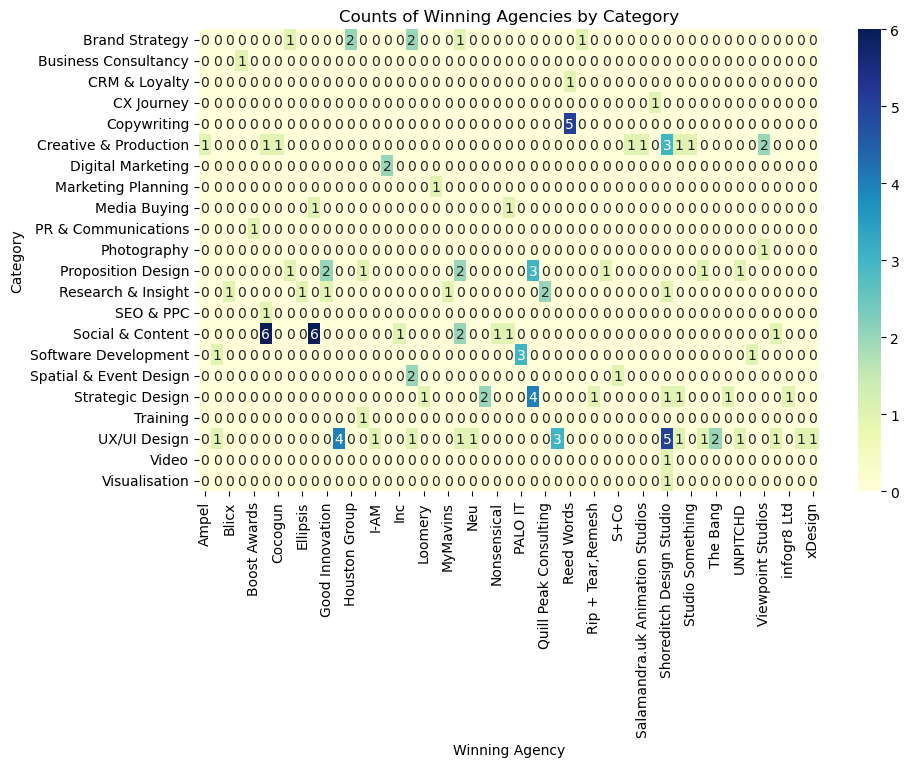

In [43]:
# Group by category and winning agency, and count the occurrences
agency_counts1 = cb2.groupby(["Category", "Winning Agency"]).size().reset_index(name='count')

# Pivot the DataFrame to create a table
table2 = agency_counts1.pivot(index='Category', columns='Winning Agency', values='count')

# Fill missing values with 0
table2 = table2.fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(table2, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Counts of Winning Agencies by Category")
plt.xlabel("Winning Agency")
plt.ylabel("Category")
plt.show()

### FOR CREATING A DATASET WITH SPLIT UP AGENCY COLUMNS

In [45]:
#FOR CREATING A DATASET WITH SPLIT UP AGENCY COLUMNS
cb2['Shortlisted Agencies'] = cb2['Shortlisted Agencies'].astype(str)

# Splitting the values and creating new columns
max_words = cb2['Shortlisted Agencies'].str.split(',', expand=True).shape[1]
for i in range(max_words):
    cb2[f'Agency {i+1}'] = cb2['Shortlisted Agencies'].str.split(',', expand=True)[i].str.strip()

/tmp/ipykernel_275/3087114597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb2['Shortlisted Agencies'] = cb2['Shortlisted Agencies'].astype(str)
/tmp/ipykernel_275/3087114597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb2[f'Agency {i+1}'] = cb2['Shortlisted Agencies'].str.split(',', expand=True)[i].str.strip()
/tmp/ipykernel_275/3087114597.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [46]:
cb2.head()

,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region,Agency 1,Agency 2,Agency 3,Agency 4,Agency 5,Agency 6
0,Biffa Corporate Event Support,Spatial & Event Design,Biffa,Matching,Hannah Fraser,unknown,5/6/2023,"Innovate Live,Experience,The Park",NaN,NaN,NaN,Innovate Live,Experience,The Park,None,None,None
1,3 Yr OneApp UX/UI Deal,UX/UI Design,JLR,Matching,Hannah Fraser,unknown,1/8/2023,The Bang,NaN,NaN,NaN,The Bang,None,None,None,None,None
2,Project Trident,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,29/5/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,NaN,xDesign,Shoreditch Design Studio,None,None,None,None
3,UX Design System,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,12/6/2023,xDesign,NaN,NaN,NaN,xDesign,None,None,None,None,None
4,Brand Refresh,Brand Strategy,Auspaynet,Matching,Kate Walker,unknown,3/7/2023,"Cocogun,Houston Group,Principals",Houston Group,NaN,AUS,Cocogun,Houston Group,Principals,None,None,None


In [47]:
# Status column value counts
column_counts = cb2['Status'].value_counts()
print(column_counts)

Archived           72
Started            33
Matching           16
Lost               14
Brief Abandoned    13
Contracting         9
Finished            5
Name: Status, dtype: int64


### Feature Augmentation: Agency Count Column 

In [48]:
#creating a  new column for agency count to track number of. shortlisted agencies 
agency_columns = ['Agency 1', 'Agency 2', 'Agency 3', 'Agency 4', 'Agency 5', 'Agency 6']

# Create the new column
cb2['Agency Count'] = cb2[agency_columns].notna().sum(axis=1)

# Replace NaN values with 0
cb2['Agency Count'] = cb2['Agency Count'].fillna(0)

# Print the updated DataFrame
cb2

/tmp/ipykernel_275/2685895483.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb2['Agency Count'] = cb2[agency_columns].notna().sum(axis=1)
/tmp/ipykernel_275/2685895483.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb2['Agency Count'] = cb2['Agency Count'].fillna(0)


,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region,Agency 1,Agency 2,Agency 3,Agency 4,Agency 5,Agency 6,Agency Count
0,Biffa Corporate Event Support,Spatial & Event Design,Biffa,Matching,Hannah Fraser,unknown,5/6/2023,"Innovate Live,Experience,The Park",NaN,NaN,NaN,Innovate Live,Experience,The Park,None,None,None,3
1,3 Yr OneApp UX/UI Deal,UX/UI Design,JLR,Matching,Hannah Fraser,unknown,1/8/2023,The Bang,NaN,NaN,NaN,The Bang,None,None,None,None,None,1
2,Project Trident,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,29/5/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,NaN,xDesign,Shoreditch Design Studio,None,None,None,None,2
3,UX Design System,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,12/6/2023,xDesign,NaN,NaN,NaN,xDesign,None,None,None,None,None,1
4,Brand Refresh,Brand Strategy,Auspaynet,Matching,Kate Walker,unknown,3/7/2023,"Cocogun,Houston Group,Principals",Houston Group,NaN,AUS,Cocogun,Houston Group,Principals,None,None,None,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Escape Travel eDM Build,CRM & Loyalty,News Corp (Aus),Finished,Kate Walker,Medium (5-10 hours),04/10/2022,Apparent,NaN,NaN,AUS,Apparent,None,None,None,None,None,1
159,Brand Escape Room Production,Brand Strategy,Aviva,Archived,Paul Bowman,Low (1-5 hours),23/01/2023,Innovate Live,Innovate Live,23/02/2023,UK,Innovate Live,None,None,None,None,None,1
161,Cover Sense ph2 (UX),UX/UI Design,TAL,Archived,Robin Scarborough,Medium (5-10 hours),01/02/2022,CS UX,Studiospace,NaN,AUS,CS UX,None,None,None,None,None,1
164,FIFA website,UX/UI Design,Gala Games,Brief Abandoned,Gideon Hyde,NaN,31/10/2022,"Studiomade, Shoreditch Design Studio, Off Brand",NaN,NaN,UK,Studiomade,Shoreditch Design Studio,Off Brand,None,None,None,3


In [49]:
cb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 170
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brief                 162 non-null    object
 1   Category              159 non-null    object
 2   Clients               162 non-null    object
 3   Status                162 non-null    object
 4   Lead                  162 non-null    object
 5   Level of effort       160 non-null    object
 6   Start date            158 non-null    object
 7   Shortlisted Agencies  162 non-null    object
 8   Winning Agency        120 non-null    object
 9   End date              64 non-null     object
 10  Region                130 non-null    object
 11  Agency 1              162 non-null    object
 12  Agency 2              78 non-null     object
 13  Agency 3              48 non-null     object
 14  Agency 4              6 non-null      object
 15  Agency 5              1 non-null      ob

# section underneath to replace the WA with Agency 1, entirely incorrect, wrong logic applied- DO NOT USE

### Replacing the NaNs for Winning Agency with Agency 1, that is the first agency for those columns with only agency 1 being the placeholder
This excludes for status with except brief abandoned and lost

In [50]:
# # Create a mask that fulfills conditions
# mask = (cb2['Winning Agency'].isna()) & (cb2['Status'].isin(["Matching", "Archived", "Started", "Contracting", "Finished"])) & (cb2["Agency Count"] == 1)

# # Use the mask to fill the NaN values in 'Winning Agency' with the corresponding values in 'Agency 1'
# cb2.loc[mask, 'Winning Agency'] = cb2.loc[mask, 'Agency 1']

# cb2

In [51]:
# #checking for nan values for "Winning Agencies"
# is_nan_wa = cb2['Winning Agency'].isnull()

# # rows with NaN values in the 'Shortlisted Agencies' column
# nan_rows_wa_new = cb2[is_nan_wa]

# # Get the number of NaN rows
# num_nans_wa_new  = is_nan_wa.sum()
# print("Number of NaN rows, that is, no value/data in 'Winning Agency' column:", num_nans_wa_new)

# nan_rows_wa_new

<!-- # Winning Agency file NaNs -->

In [52]:
# downloading Winning Agencies NaN file
# nan_rows_wa_new.to_csv('nan_instances_wa.csv', index=False)

In [53]:
# # Checking for instances before NaNs in shortlisted agencies was dropped 
# num_rows_with_nan_wa = len(cb2)
# print("Number of instances before dropping NaN values:", num_rows_with_nan_wa)

# #dropping all NaNs for winning agency 
# cb2.dropna(subset=['Winning Agency'], inplace=True)

# # Check the number of rows after dropping NaN values
# num_rows_without_nan_wa = len(cb2)
# print("Number of instances after dropping NaN values:", num_rows_without_nan_wa)

In [54]:
# #checking for nan values for "Winning Agencies"
# is_nan_wa = cb2['Winning Agency'].isnull()

# # Printing rows with NaN values in the 'Winning Agency' column
# nan_rows_wa = cb2[is_nan_wa]

# # Get the number of NaN rows
# num_nans_wa = is_nan_wa.sum()
# print("Number of NaN rows, that is, no value/data in 'Winning Agency' column:", num_nans_wa)

## Region 

In [55]:
cb2["Region"].value_counts()

UK     92
AUS    37
US      1
Name: Region, dtype: int64

In [56]:
cb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 170
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brief                 162 non-null    object
 1   Category              159 non-null    object
 2   Clients               162 non-null    object
 3   Status                162 non-null    object
 4   Lead                  162 non-null    object
 5   Level of effort       160 non-null    object
 6   Start date            158 non-null    object
 7   Shortlisted Agencies  162 non-null    object
 8   Winning Agency        120 non-null    object
 9   End date              64 non-null     object
 10  Region                130 non-null    object
 11  Agency 1              162 non-null    object
 12  Agency 2              78 non-null     object
 13  Agency 3              48 non-null     object
 14  Agency 4              6 non-null      object
 15  Agency 5              1 non-null      ob

In [58]:
# Check for NaN values in the 'Region' column
nan_values_region = cb2['Region'].isnull().sum()

# Print the number of NaN values
print("Number of NaN values in the 'region' column:", nan_values_region)

# show only rows with NaN values in the 'region' column
nan_rows_region = cb2[cb2['Region'].isnull()]

# Print the rows with NaN values in the 'region' column
nan_rows_region

Number of NaN values in the 'region' column: 32


,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region,Agency 1,Agency 2,Agency 3,Agency 4,Agency 5,Agency 6,Agency Count
0,Biffa Corporate Event Support,Spatial & Event Design,Biffa,Matching,Hannah Fraser,unknown,5/6/2023,"Innovate Live,Experience,The Park",NaN,NaN,NaN,Innovate Live,Experience,The Park,None,None,None,3
1,3 Yr OneApp UX/UI Deal,UX/UI Design,JLR,Matching,Hannah Fraser,unknown,1/8/2023,The Bang,NaN,NaN,NaN,The Bang,None,None,None,None,None,1
2,Project Trident,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,29/5/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,NaN,xDesign,Shoreditch Design Studio,None,None,None,None,2
3,UX Design System,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,12/6/2023,xDesign,NaN,NaN,NaN,xDesign,None,None,None,None,None,1
6,Generative AI,UX/UI Design,Aviva,Matching,Paul Bowman,unknown,12/6/2023,xDesign,NaN,NaN,NaN,xDesign,None,None,None,None,None,1
8,Rebrand & Research,Brand Strategy,British Sugar,Matching,Peter Sayburn,unknown,22/5/2023,"I-AM,Manifest Group,Daughter Studio",NaN,NaN,NaN,I-AM,Manifest Group,Daughter Studio,None,None,None,3
9,Chat & Chatbot \n,CX Journey,CFS,Brief Abandoned,Robin Scarborough,unknown,8/5/2023,VERSA AGENCY,NaN,NaN,NaN,VERSA AGENCY,None,None,None,None,None,1
10,Corporate Website Design + Build,Software Development,D&G,Matching,Hannah Fraser,unknown,5/6/2023,"Shoreditch Design Studio,OHMY,Solace Digital",NaN,NaN,NaN,Shoreditch Design Studio,OHMY,Solace Digital,None,None,None,3
11,Product Vision Video,Video,Fenergo,Matching,George Patten,unknown,25/5/2023,"Shoreditch Design Studio,Hatch Films CIC,Josep...",NaN,NaN,NaN,Shoreditch Design Studio,Hatch Films CIC,Josephmark,None,None,None,3
12,SEO - Legal Services,SEO & PPC,Fletchers Solicitors,Matching,Peter Sayburn,unknown,5/6/2023,"Three Whiskey,Croud",NaN,NaN,NaN,Three Whiskey,Croud,None,None,None,None,2


In [59]:
#printing for all leads within the nans to fill the nans as specified 
nan_rows_region["Lead"].value_counts()

Peter Sayburn        10
Hannah Fraser         9
Paul Bowman           5
Robin Scarborough     2
George Patten         2
Kate Walker           2
Phil Kohler           2
Name: Lead, dtype: int64

### coded as: 
1. UK = Gideon, Hannah, Paul, Peter or Phil

2. AUS = Callum, Kate or Robin

3. US = David

hence, now filling for the six missing values within this

In [60]:
# Define the mapping of 'lead' values to 'region' values
lead_region_mapping = {
    'Peter Sayburn': 'UK',
    'Hannah Fraser': 'UK',
    'Paul Bowman': 'UK',
    'Robin Scarborough': 'AUS',
    'George Patten': 'AUS',
    'Kate Walker': 'AUS',
    'Phil Kohler': 'UK'
}

# Fill NaN values in 'region' based on 'lead' values using the mapping
cb2['Region'] = cb2.apply(lambda row: lead_region_mapping[row['Lead']]
                          if pd.isnull(row['Region']) 
                          else row['Region'], axis=1)

# Print the updated DataFrame
cb2


/tmp/ipykernel_275/68642681.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cb2['Region'] = cb2.apply(lambda row: lead_region_mapping[row['Lead']]


,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region,Agency 1,Agency 2,Agency 3,Agency 4,Agency 5,Agency 6,Agency Count
0,Biffa Corporate Event Support,Spatial & Event Design,Biffa,Matching,Hannah Fraser,unknown,5/6/2023,"Innovate Live,Experience,The Park",NaN,NaN,UK,Innovate Live,Experience,The Park,None,None,None,3
1,3 Yr OneApp UX/UI Deal,UX/UI Design,JLR,Matching,Hannah Fraser,unknown,1/8/2023,The Bang,NaN,NaN,UK,The Bang,None,None,None,None,None,1
2,Project Trident,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,29/5/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,UK,xDesign,Shoreditch Design Studio,None,None,None,None,2
3,UX Design System,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,12/6/2023,xDesign,NaN,NaN,UK,xDesign,None,None,None,None,None,1
4,Brand Refresh,Brand Strategy,Auspaynet,Matching,Kate Walker,unknown,3/7/2023,"Cocogun,Houston Group,Principals",Houston Group,NaN,AUS,Cocogun,Houston Group,Principals,None,None,None,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Escape Travel eDM Build,CRM & Loyalty,News Corp (Aus),Finished,Kate Walker,Medium (5-10 hours),04/10/2022,Apparent,NaN,NaN,AUS,Apparent,None,None,None,None,None,1
159,Brand Escape Room Production,Brand Strategy,Aviva,Archived,Paul Bowman,Low (1-5 hours),23/01/2023,Innovate Live,Innovate Live,23/02/2023,UK,Innovate Live,None,None,None,None,None,1
161,Cover Sense ph2 (UX),UX/UI Design,TAL,Archived,Robin Scarborough,Medium (5-10 hours),01/02/2022,CS UX,Studiospace,NaN,AUS,CS UX,None,None,None,None,None,1
164,FIFA website,UX/UI Design,Gala Games,Brief Abandoned,Gideon Hyde,NaN,31/10/2022,"Studiomade, Shoreditch Design Studio, Off Brand",NaN,NaN,UK,Studiomade,Shoreditch Design Studio,Off Brand,None,None,None,3


In [61]:
# Check for NaN values in the 'Region' column
nan_values_region = cb2['Region'].isnull().sum()

# Print the number of NaN values
print("Number of NaN values in the 'region' column:", nan_values_region)

# show only rows with NaN values in the 'region' column
nan_rows_region = cb2[cb2['Region'].isnull()]

# Print the rows with NaN values in the 'region' column
nan_rows_region

Number of NaN values in the 'region' column: 0


,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region,Agency 1,Agency 2,Agency 3,Agency 4,Agency 5,Agency 6,Agency Count


all missing for region handled

In [62]:
cb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 170
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brief                 162 non-null    object
 1   Category              159 non-null    object
 2   Clients               162 non-null    object
 3   Status                162 non-null    object
 4   Lead                  162 non-null    object
 5   Level of effort       160 non-null    object
 6   Start date            158 non-null    object
 7   Shortlisted Agencies  162 non-null    object
 8   Winning Agency        120 non-null    object
 9   End date              64 non-null     object
 10  Region                162 non-null    object
 11  Agency 1              162 non-null    object
 12  Agency 2              78 non-null     object
 13  Agency 3              48 non-null     object
 14  Agency 4              6 non-null      object
 15  Agency 5              1 non-null      ob

### Agency Count

In [63]:
cb2["Agency Count"].value_counts()

1    84
3    42
2    30
4     5
6     1
Name: Agency Count, dtype: int64

In [64]:
agency_counts = cb2["Agency Count"].value_counts()

for count, num_instances in agency_counts.items():
    if num_instances == 1:
        print(f'There is {num_instances} instance where {count} agencies were shortlisted.')
    elif count == 1:
        print(f'There are {num_instances} instances where {count} agency was shortlisted.')
    else:
        print(f'There are {num_instances} instances where {count} agencies were shortlisted.')

There are 84 instances where 1 agency was shortlisted.
There are 42 instances where 3 agencies were shortlisted.
There are 30 instances where 2 agencies were shortlisted.
There are 5 instances where 4 agencies were shortlisted.
There is 1 instance where 6 agencies were shortlisted.


In [65]:
agency_count_counts = cb2["Agency Count"].value_counts()
total_count = len(cb2)
percentage_counts = np.round((agency_count_counts / total_count) * 100, 2)
print(percentage_counts)

1    51.85
3    25.93
2    18.52
4     3.09
6     0.62
Name: Agency Count, dtype: float64


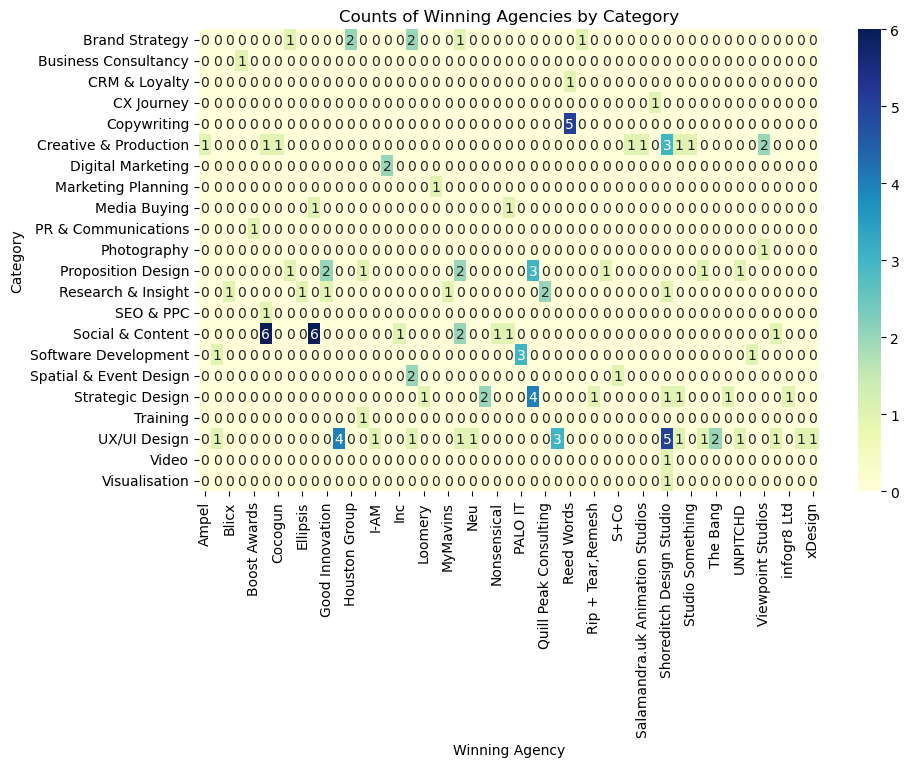

In [66]:
# Group by category and winning agency, and count the occurrences
agency_counts3 = cb2.groupby(["Category", "Winning Agency"]).size().reset_index(name='count')

# Pivot the DataFrame to create a table
table3 = agency_counts3.pivot(index='Category', columns='Winning Agency', values='count')

# Fill missing values with 0
table3= table3.fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(table2, annot=True, cmap="YlGnBu", fmt="g")
plt.title("Counts of Winning Agencies by Category")
plt.xlabel("Winning Agency")
plt.ylabel("Category")
plt.show()

In [67]:
wa_value_counts = cb2["Winning Agency"].value_counts()
print(wa_value_counts)

Shoreditch Design Studio           12
Buddy Media                         8
Path Ventures                       7
GH05T Ltd.                          7
NMD+                                6
Reed Words                          6
Innovate Live                       5
Hedgehog Lab                        4
PALO IT                             3
Raw.Studio                          3
Good Innovation                     3
Viewpoint Studios                   3
Sketch & Co                         3
Studiospace                         2
In Marketing We Trust               2
Orange Panther Collective           2
Apex1                               2
UNPITCHD                            2
Wonderful                           2
Houston Group                       2
Nimbletank                          2
How To Impact                       2
Quill Peak Consulting               2
Daughter Studio                     2
The Bang                            2
Inc                                 1
Rufus Leonar

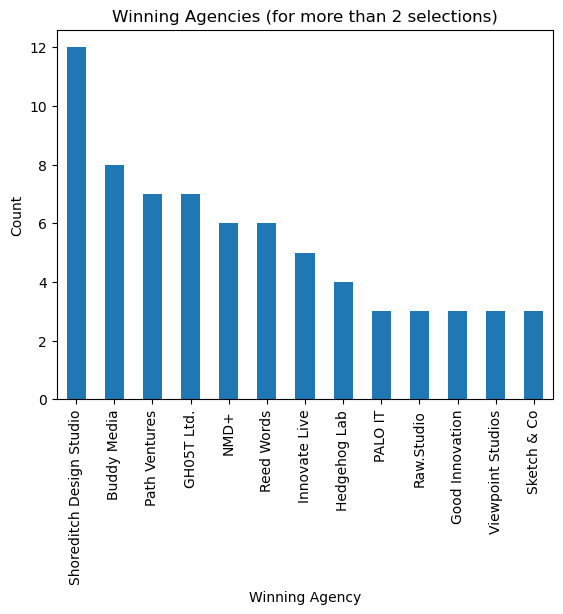

In [148]:
#plot for most chosen agencies
cb2["Winning Agency"].value_counts().loc[lambda x: x > 2].plot(kind='bar')

plt.xlabel('Winning Agency')
plt.ylabel('Count')
plt.title('Winning Agencies (for more than 2 selections)')
plt.show()

### sorting for studiospace to view, sorting by agency count

In [149]:
# # Sort the dataframe by 'Agency Count'
# cb_ac_sort = cb2.sort_values('Agency Count')

# # Check the sorted dataframe
# cb_ac_sort.head()

,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region,Agency 1,Agency 2,Agency 3,Agency 4,Agency 5,Agency 6,Agency Count
170,Sustainability Copywriting - Extension,Copywriting,Oxford Properties,Lost,Paul Bowman,NaN,01/05/2023,Reed Words,NaN,NaN,UK,Reed Words,None,None,None,None,None,1
67,MOCO marketing Jul-Oct extension,Social & Content,Aviva,Archived,Peter Sayburn,Low (1-5 hours),1/7/2022,Buddy Media,Buddy Media,28/10/2022,UK,Buddy Media,None,None,None,None,None,1
66,Home sustainability (smoke test),Research & Insight,Aviva,Archived,Phil Kohler,Medium (5-10 hours),27/6/2022,Good Innovation,Good Innovation,NaN,UK,Good Innovation,None,None,None,None,None,1
65,DW Overarching Vision,Proposition Design,Aviva,Archived,Paul Bowman,Low (1-5 hours),27/6/2022,Studiospace,Studiospace,28/10/2022,UK,Studiospace,None,None,None,None,None,1
64,MOCO Board Comms,Creative & Production,Aviva,Archived,Peter Sayburn,Low (1-5 hours),2/5/2022,Buddy Media,Buddy Media,NaN,UK,Buddy Media,None,None,None,None,None,1


In [79]:
#downloading the file 
# *TO SHOW SS
#cb_ac_sort.to_csv("cb_ac_sort.csv", index=False)

## Distribution of Agency Count

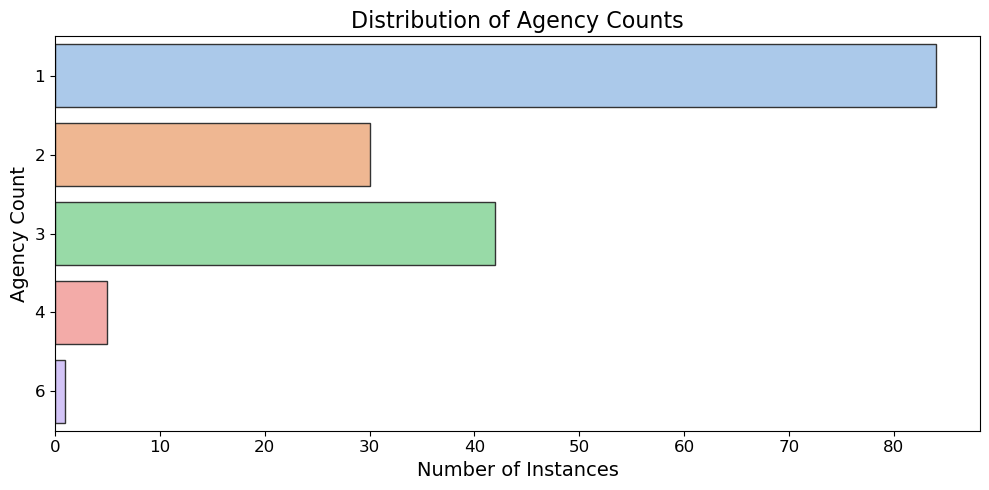

In [68]:
# Set a color palette
sns.set_palette('pastel')

# Create a figure 
fig, ax = plt.subplots(figsize=(10, 5))

# Define counts
agency_counts = cb2['Agency Count'].value_counts()

# Create a horizontal bar plot for the pie chart alternative
sns.barplot(y=agency_counts.index, x=agency_counts.values, ax=ax, edgecolor=".2", orient="h")
ax.set_title('Distribution of Agency Counts', fontsize=16)
ax.set_xlabel('Number of Instances', fontsize=14)
ax.set_ylabel('Agency Count', fontsize=14)
ax.tick_params(labelsize=12)

# Improve the layout and display the figure
fig.tight_layout()
plt.show()


# Feature Engineering

# Client agency interaction analysis


## Client-SA Interaction

In [72]:
cb3 = cb2.copy()
cb3

,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region,Agency 1,Agency 2,Agency 3,Agency 4,Agency 5,Agency 6,Agency Count
0,Biffa Corporate Event Support,Spatial & Event Design,Biffa,Matching,Hannah Fraser,unknown,5/6/2023,"Innovate Live,Experience,The Park",NaN,NaN,UK,Innovate Live,Experience,The Park,None,None,None,3
1,3 Yr OneApp UX/UI Deal,UX/UI Design,JLR,Matching,Hannah Fraser,unknown,1/8/2023,The Bang,NaN,NaN,UK,The Bang,None,None,None,None,None,1
2,Project Trident,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,29/5/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,UK,xDesign,Shoreditch Design Studio,None,None,None,None,2
3,UX Design System,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,12/6/2023,xDesign,NaN,NaN,UK,xDesign,None,None,None,None,None,1
4,Brand Refresh,Brand Strategy,Auspaynet,Matching,Kate Walker,unknown,3/7/2023,"Cocogun,Houston Group,Principals",Houston Group,NaN,AUS,Cocogun,Houston Group,Principals,None,None,None,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Escape Travel eDM Build,CRM & Loyalty,News Corp (Aus),Finished,Kate Walker,Medium (5-10 hours),04/10/2022,Apparent,NaN,NaN,AUS,Apparent,None,None,None,None,None,1
159,Brand Escape Room Production,Brand Strategy,Aviva,Archived,Paul Bowman,Low (1-5 hours),23/01/2023,Innovate Live,Innovate Live,23/02/2023,UK,Innovate Live,None,None,None,None,None,1
161,Cover Sense ph2 (UX),UX/UI Design,TAL,Archived,Robin Scarborough,Medium (5-10 hours),01/02/2022,CS UX,Studiospace,NaN,AUS,CS UX,None,None,None,None,None,1
164,FIFA website,UX/UI Design,Gala Games,Brief Abandoned,Gideon Hyde,NaN,31/10/2022,"Studiomade, Shoreditch Design Studio, Off Brand",NaN,NaN,UK,Studiomade,Shoreditch Design Studio,Off Brand,None,None,None,3


In [165]:
# Define the client and agency columns
client_col = 'Clients'
agency_cols = ['Agency 1', 'Agency 2', 'Agency 3', 'Agency 4', 'Agency 5', 'Agency 6']

# Iterate over agency columns to create interaction count columns
for i, agency_col in enumerate(agency_cols, start=1):
    # Create interaction count column
    cb3[f'shortlisted_agency_{i}_interaction_count'] = cb3.groupby([client_col, agency_col])[agency_col].transform('count')

# Replace NaN values (caused by the groupby operation for client-agency pairs that only occur once) with 1
cb3.fillna(1, inplace=True)


In [190]:
cb3["shortlisted_agency_1_interaction_count"].value_counts()

1    73
2    26
3    24
4    16
5    15
8     8
Name: shortlisted_agency_1_interaction_count, dtype: int64

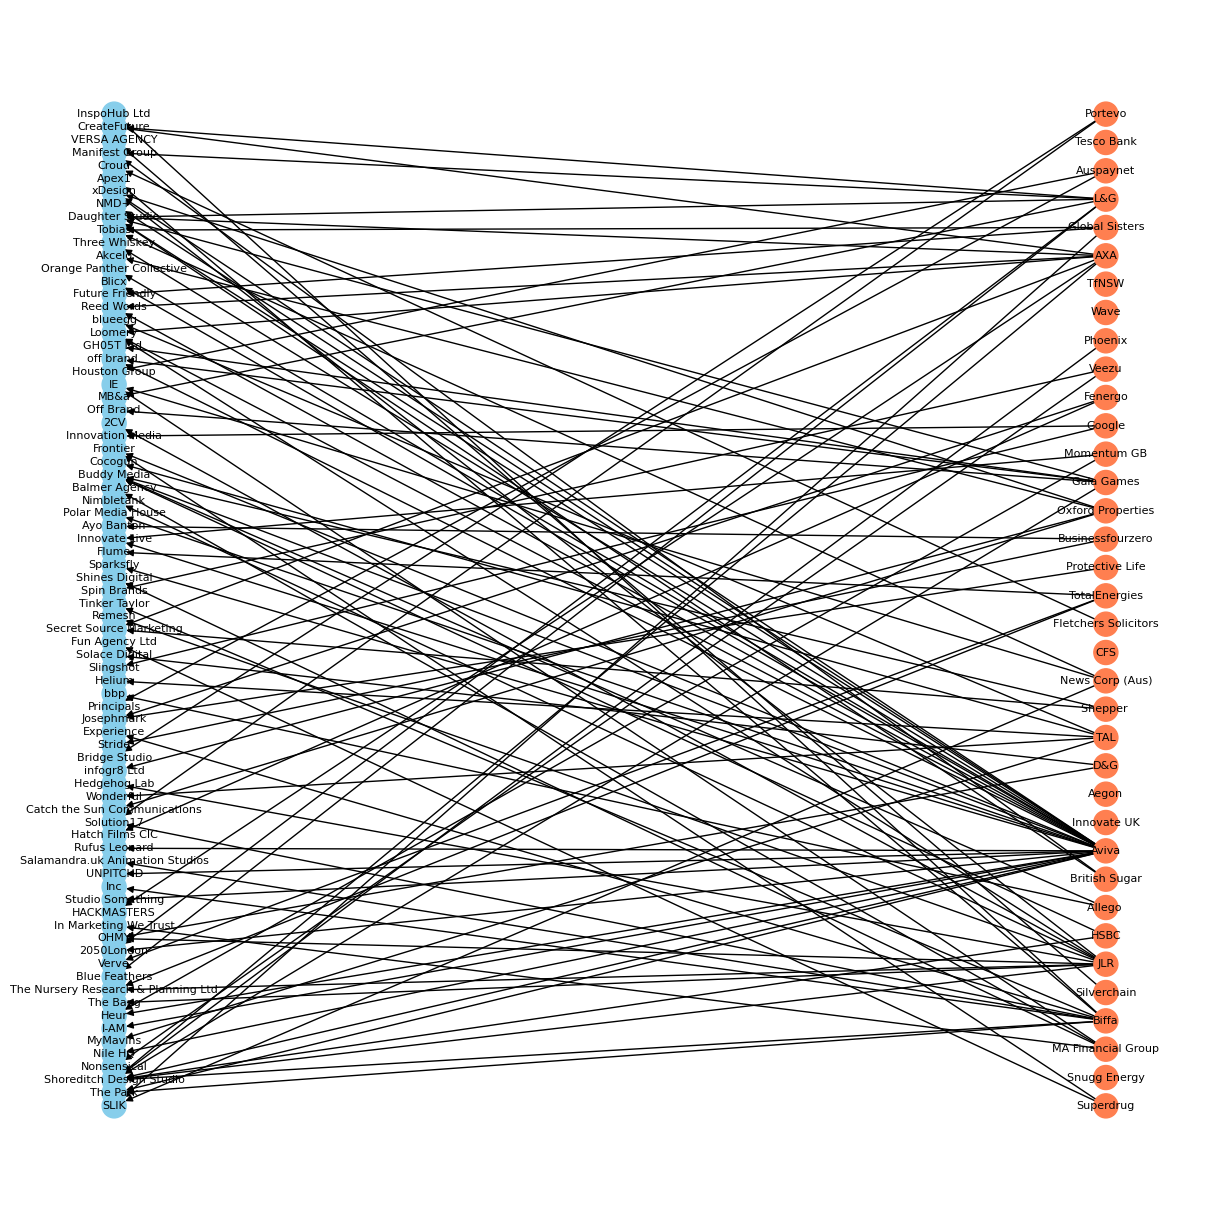

In [77]:
import networkx as nx
#Network Diagram 
# Get unique agencies
agencies_columns = ["Agency 2", "Agency 3", "Agency 4","Agency 5","Agency 6"]
agencies = pd.unique(cb3[agencies_columns].values.ravel('K'))

# Remove None or NaN values
agencies = [x for x in agencies if pd.notna(x)]

# Get unique clients
clients = cb3['Clients'].unique()

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes for agencies and clients
G.add_nodes_from(agencies, bipartite=0)
G.add_nodes_from(clients, bipartite=1)

# Loop through the dataset to add edges (interactions)
for index, row in cb3.iterrows():
    client = row['Clients']
    for agency in agencies_columns:
        if pd.notna(row[agency]):
            G.add_edge(client, row[agency])

# Draw the bipartite graph
plt.figure(figsize=(12, 12))  # Increase the figure size
pos = nx.bipartite_layout(G, [n for n, d in G.nodes(data=True) if d['bipartite']==0], scale=2)  # Increase the spacing
nx.draw(G, pos, with_labels=True, node_color=["skyblue" if d['bipartite']==0 else "coral" for n, d in G.nodes(data=True)], font_size=8)  # Decrease label font size
plt.show()


## Client-WA Interaction 

In [78]:
# Count of past projects between each client and winning agency
interaction_count = cb2.groupby(['Clients', 'Winning Agency']).size().reset_index(name='Client_WA_Interaction')
cb3 = cb2.merge(interaction_count, how='left', on=['Clients', 'Winning Agency'])
cb3

,Brief,Category,Clients,Status,Lead,Level of effort,Start date,Shortlisted Agencies,Winning Agency,End date,Region,Agency 1,Agency 2,Agency 3,Agency 4,Agency 5,Agency 6,Agency Count,Client_WA_Interaction
0,Biffa Corporate Event Support,Spatial & Event Design,Biffa,Matching,Hannah Fraser,unknown,5/6/2023,"Innovate Live,Experience,The Park",NaN,NaN,UK,Innovate Live,Experience,The Park,None,None,None,3,NaN
1,3 Yr OneApp UX/UI Deal,UX/UI Design,JLR,Matching,Hannah Fraser,unknown,1/8/2023,The Bang,NaN,NaN,UK,The Bang,None,None,None,None,None,1,NaN
2,Project Trident,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,29/5/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,UK,xDesign,Shoreditch Design Studio,None,None,None,None,2,NaN
3,UX Design System,UX/UI Design,Phoenix,Matching,Peter Sayburn,unknown,12/6/2023,xDesign,NaN,NaN,UK,xDesign,None,None,None,None,None,1,NaN
4,Brand Refresh,Brand Strategy,Auspaynet,Matching,Kate Walker,unknown,3/7/2023,"Cocogun,Houston Group,Principals",Houston Group,NaN,AUS,Cocogun,Houston Group,Principals,None,None,None,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Escape Travel eDM Build,CRM & Loyalty,News Corp (Aus),Finished,Kate Walker,Medium (5-10 hours),04/10/2022,Apparent,NaN,NaN,AUS,Apparent,None,None,None,None,None,1,NaN
158,Brand Escape Room Production,Brand Strategy,Aviva,Archived,Paul Bowman,Low (1-5 hours),23/01/2023,Innovate Live,Innovate Live,23/02/2023,UK,Innovate Live,None,None,None,None,None,1,5.0
159,Cover Sense ph2 (UX),UX/UI Design,TAL,Archived,Robin Scarborough,Medium (5-10 hours),01/02/2022,CS UX,Studiospace,NaN,AUS,CS UX,None,None,None,None,None,1,1.0
160,FIFA website,UX/UI Design,Gala Games,Brief Abandoned,Gideon Hyde,NaN,31/10/2022,"Studiomade, Shoreditch Design Studio, Off Brand",NaN,NaN,UK,Studiomade,Shoreditch Design Studio,Off Brand,None,None,None,3,NaN


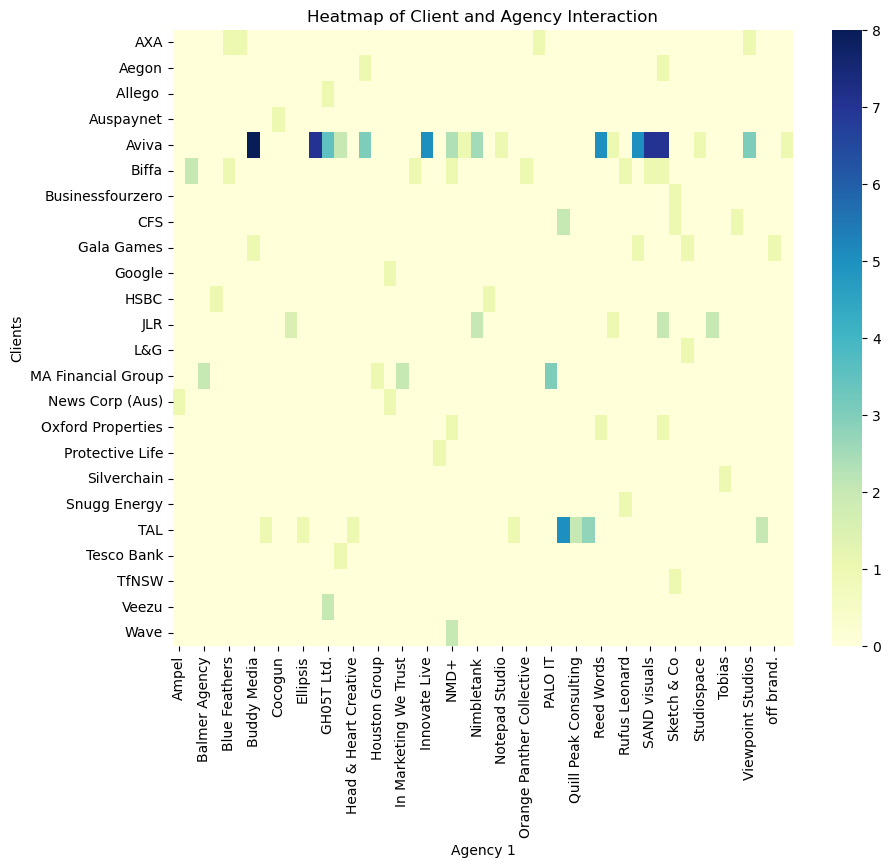

In [79]:
# Pivot table to get interaction counts between Clients and Winning Agencies
pivot_table = cb3.pivot_table(values='Client_WA_Interaction', 
                             index='Clients', columns='Agency 1', fill_value=0)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap="YlGnBu")
plt.title('Heatmap of Client and Agency Interaction')
plt.show()

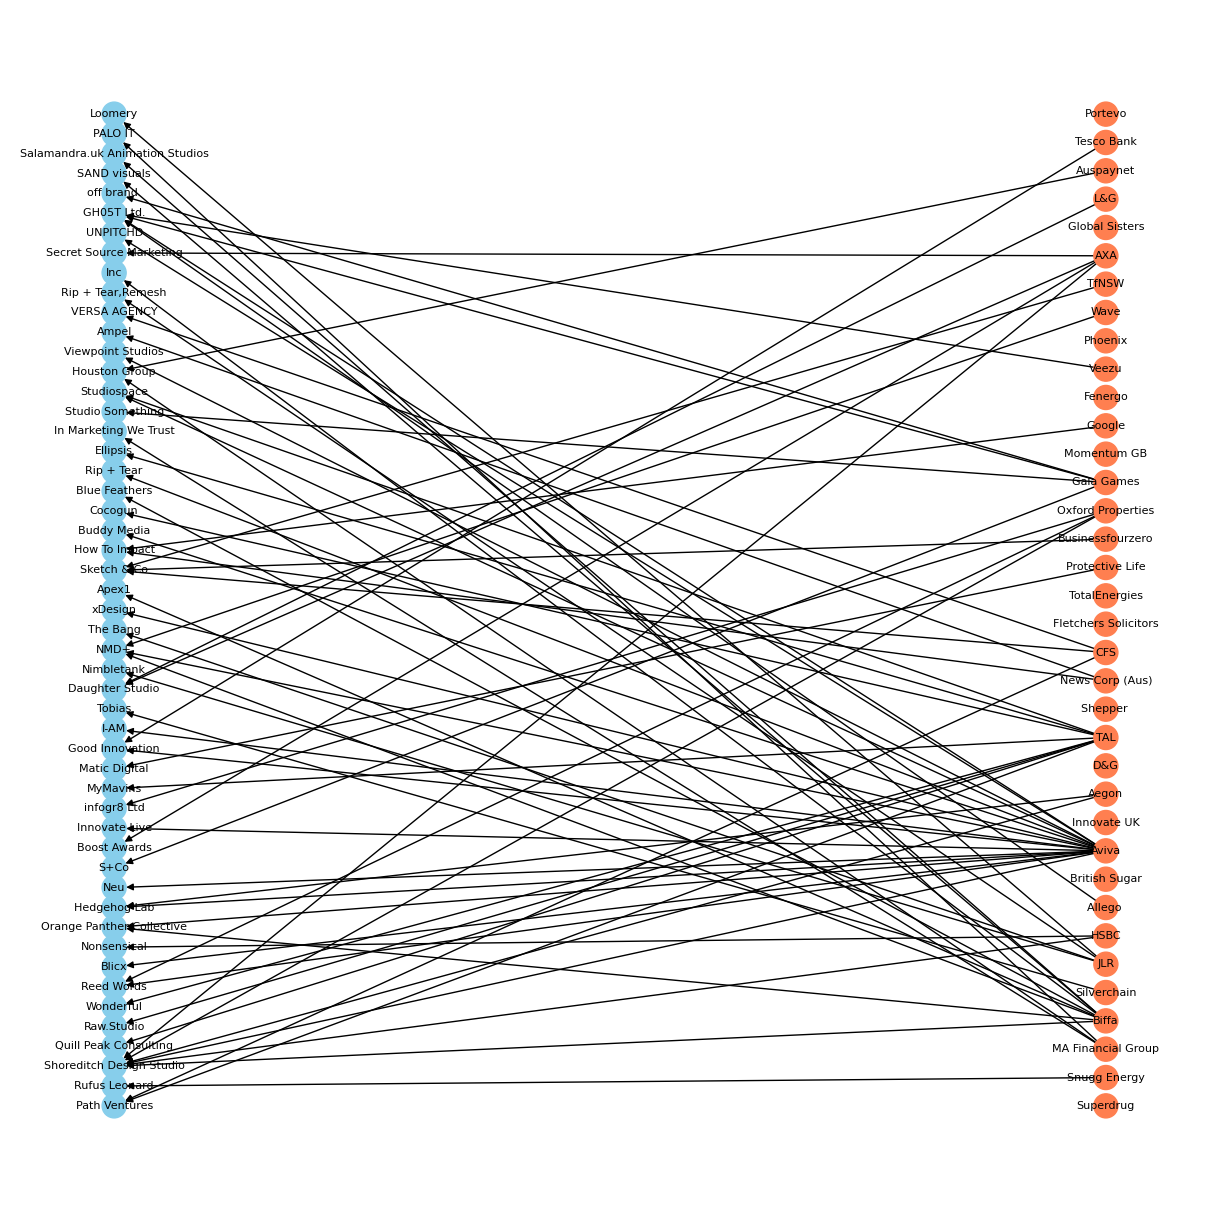

In [80]:
# Get unique agencies
agencies_columns = ["Winning Agency"]
agencies = pd.unique(cb3[agencies_columns].values.ravel('K'))

# Remove None or NaN values
agencies = [x for x in agencies if pd.notna(x)]

# Get unique clients
clients = cb3['Clients'].unique()

# Create an empty directed graph
G = nx.DiGraph()

# Add nodes for agencies and clients
G.add_nodes_from(agencies, bipartite=0)
G.add_nodes_from(clients, bipartite=1)

# Loop through the dataset to add edges (interactions)
for index, row in cb3.iterrows():
    client = row['Clients']
    for agency in agencies_columns:
        if pd.notna(row[agency]):
            G.add_edge(client, row[agency])

# Draw the bipartite graph
plt.figure(figsize=(12, 12))  # Increase the figure size
pos = nx.bipartite_layout(G, [n for n, d in G.nodes(data=True) if d['bipartite']==0], scale=2)  # Increase the spacing
nx.draw(G, pos, with_labels=True, node_color=["skyblue" if d['bipartite']==0 else "coral" for n, d in G.nodes(data=True)], font_size=8)  # Decrease label font size
plt.show()


## Category Column

#### descriptive statistics

In [81]:
category_counts = cb2['Category'].value_counts()
print(category_counts)

UX/UI Design              35
Social & Content          19
Proposition Design        16
Creative & Production     14
Strategic Design          12
Brand Strategy             9
Software Development       9
Research & Insight         9
Spatial & Event Design     6
Copywriting                6
Digital Marketing          4
Media Buying               3
Training                   2
CRM & Loyalty              2
Marketing Planning         2
SEO & PPC                  2
Video                      2
CX Journey                 2
Visualisation              2
PR & Communications        1
Photography                1
Business Consultancy       1
Name: Category, dtype: int64


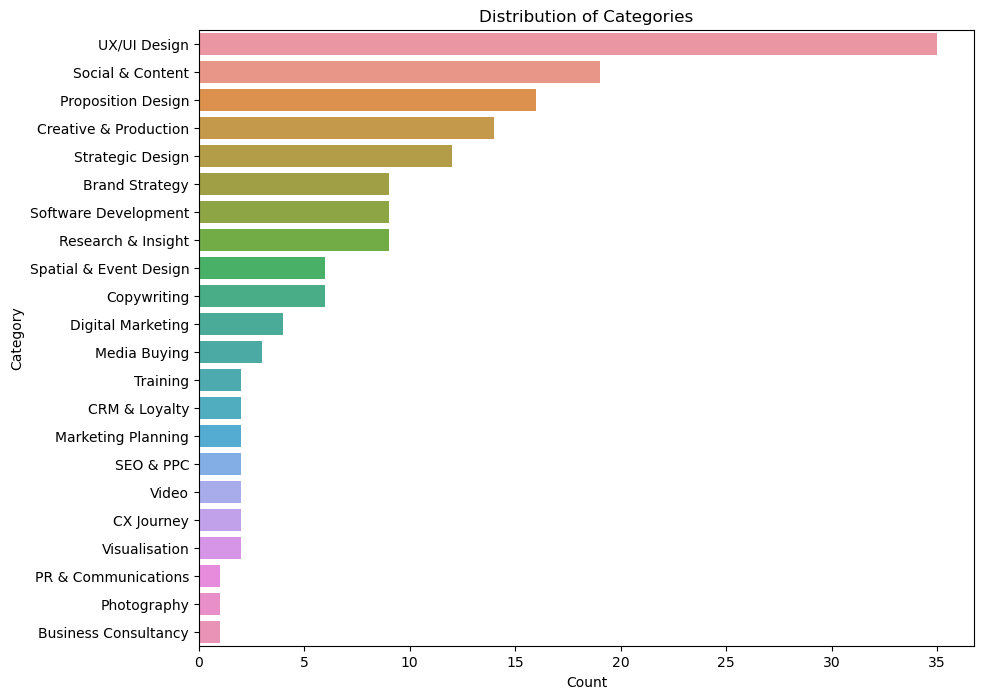

In [82]:
plt.figure(figsize=(10, 8))
sns.countplot(y='Category', data=cb2, order=cb2['Category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

# Client-WA Interaction by Category Analysis

Category
SEO & PPC                 8.000000
CRM & Loyalty             5.000000
Copywriting               4.200000
Social & Content          3.833333
Spatial & Event Design    3.666667
Photography               3.000000
Creative & Production     2.916667
UX/UI Design              2.640000
Strategic Design          2.500000
Proposition Design        2.416667
Software Development      2.400000
Research & Insight        2.285714
Brand Strategy            2.285714
Media Buying              2.000000
Digital Marketing         2.000000
Business Consultancy      1.000000
PR & Communications       1.000000
Marketing Planning        1.000000
Training                  1.000000
CX Journey                1.000000
Video                     1.000000
Visualisation             1.000000
Name: Client_WA_Interaction, dtype: float64


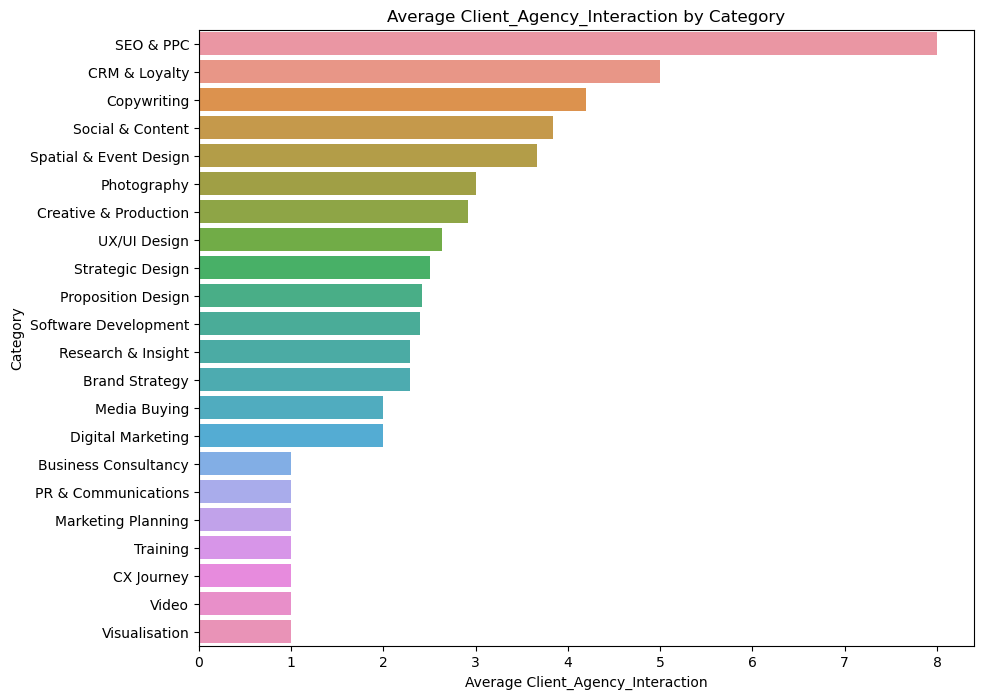

In [83]:
category_interaction = cb3.groupby('Category')['Client_WA_Interaction'].mean().sort_values(ascending=False)

print(category_interaction)

plt.figure(figsize=(10, 8))
sns.barplot(x=category_interaction.values, y=category_interaction.index)
plt.title('Average Client_Agency_Interaction by Category')
plt.xlabel('Average Client_Agency_Interaction')
plt.ylabel('Category')
plt.show()

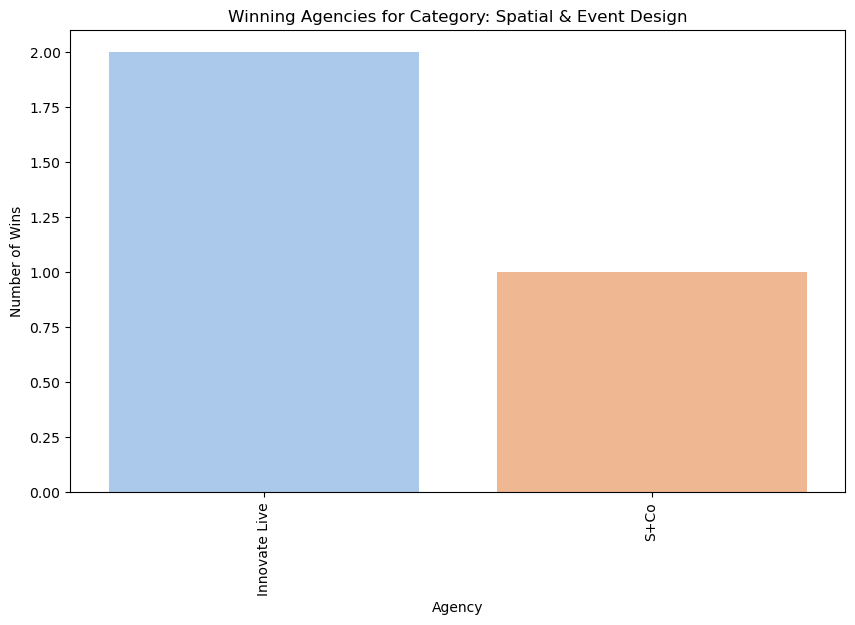

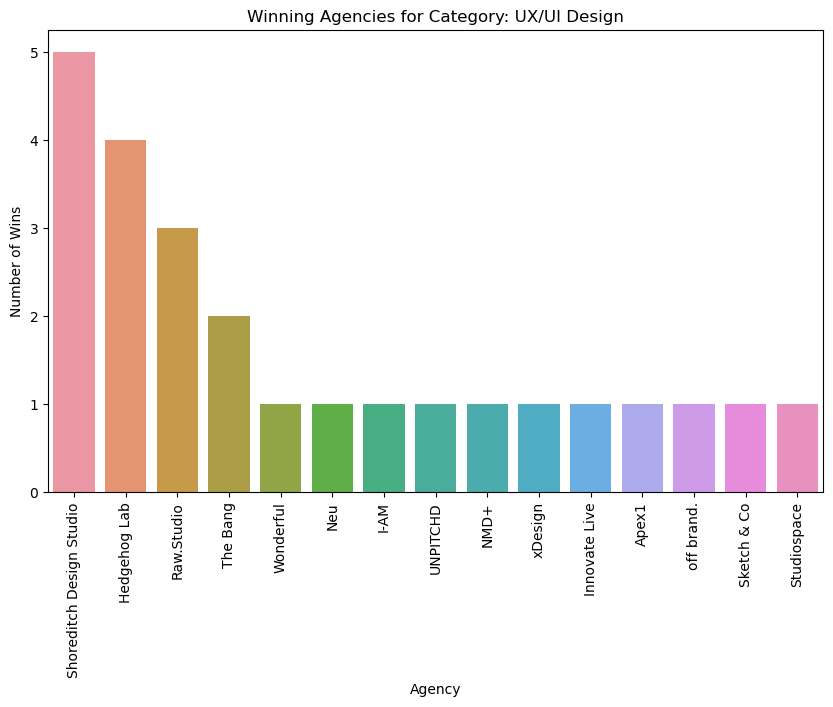

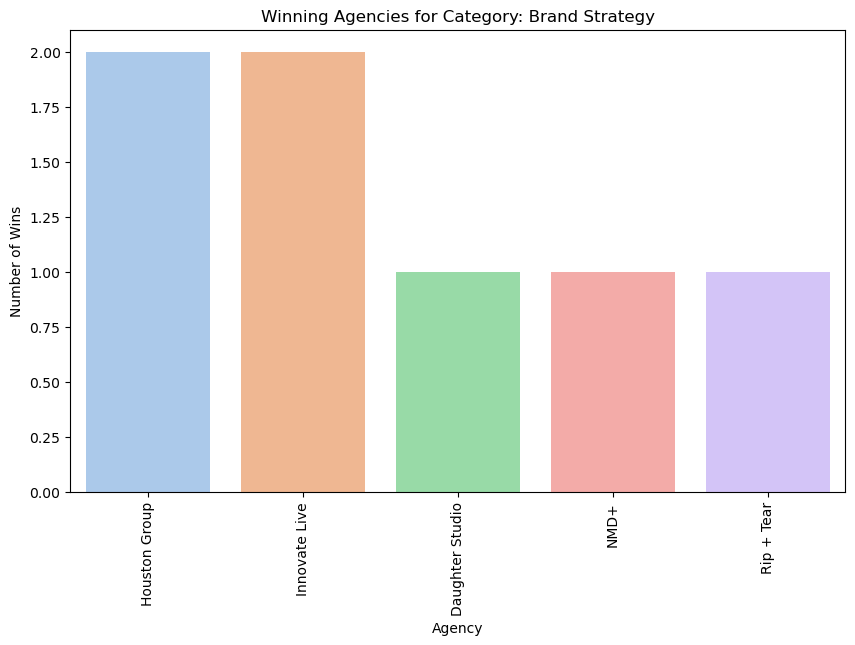

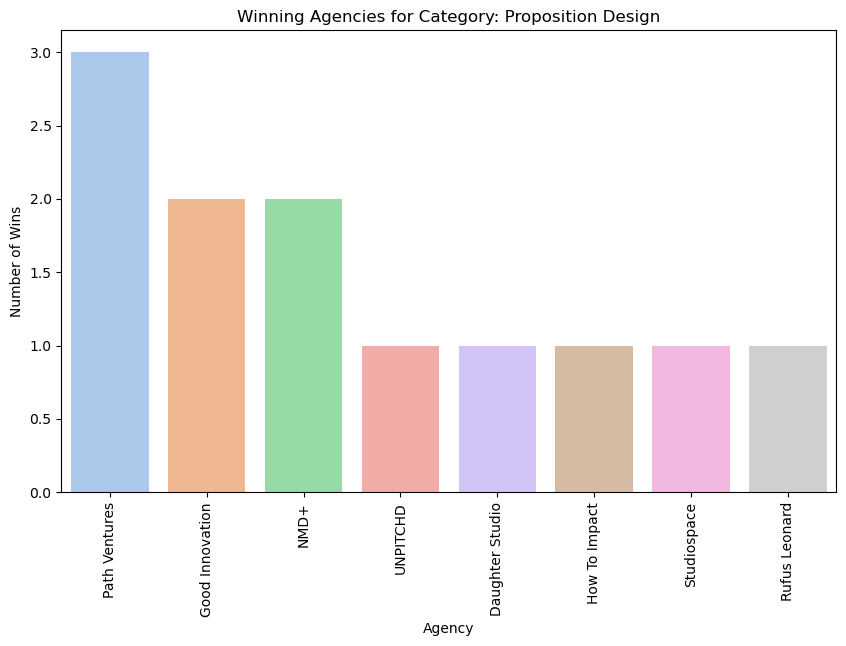

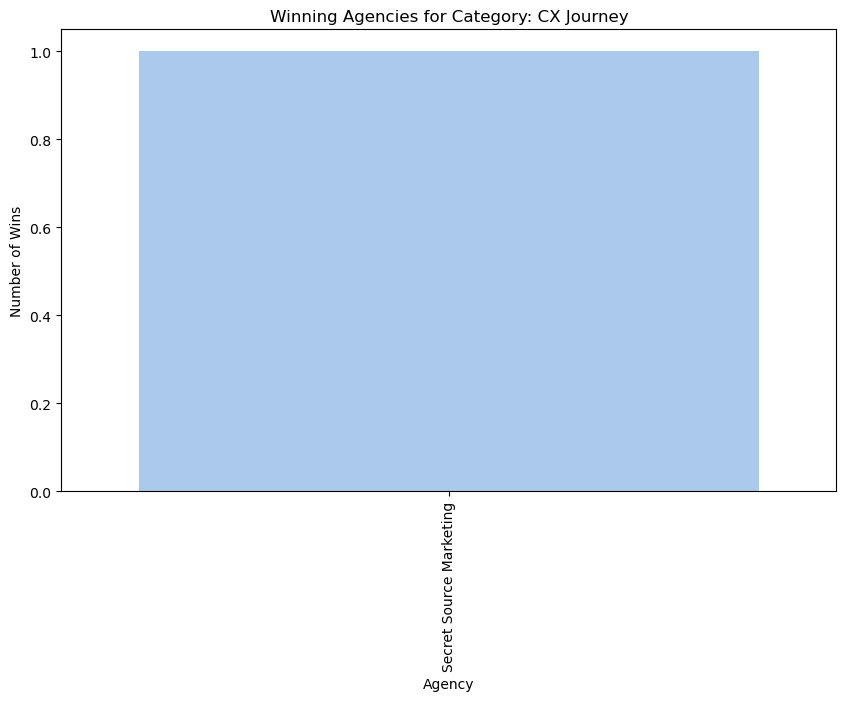

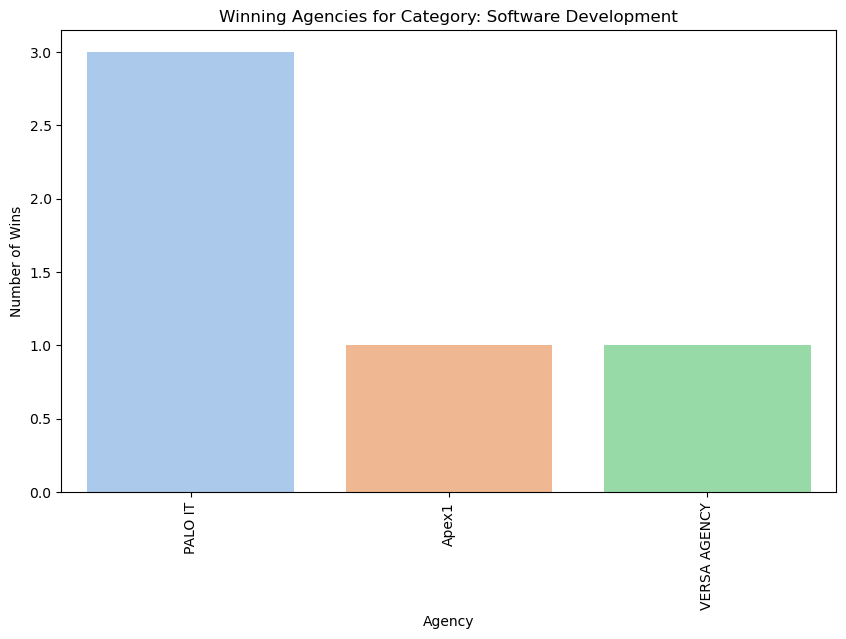

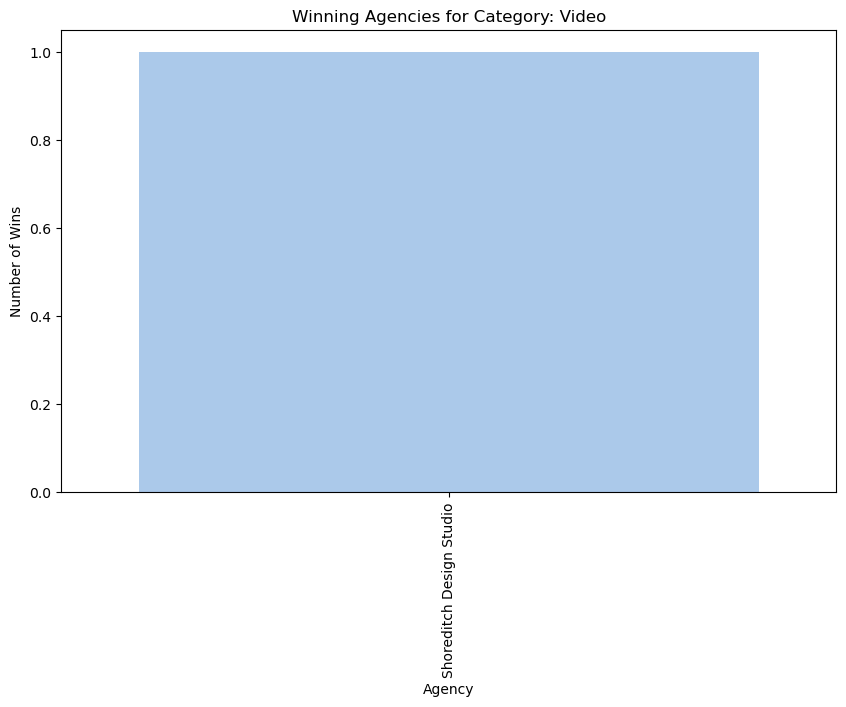

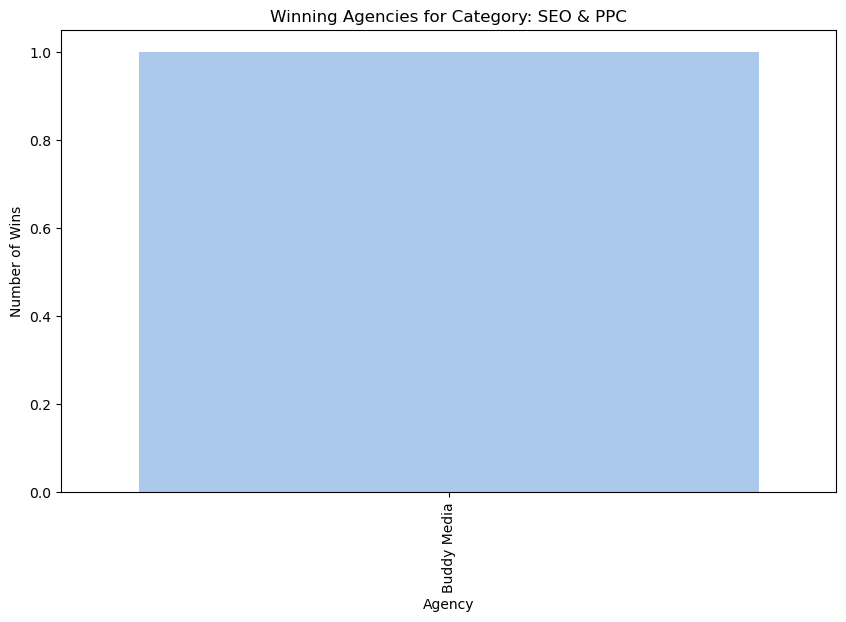

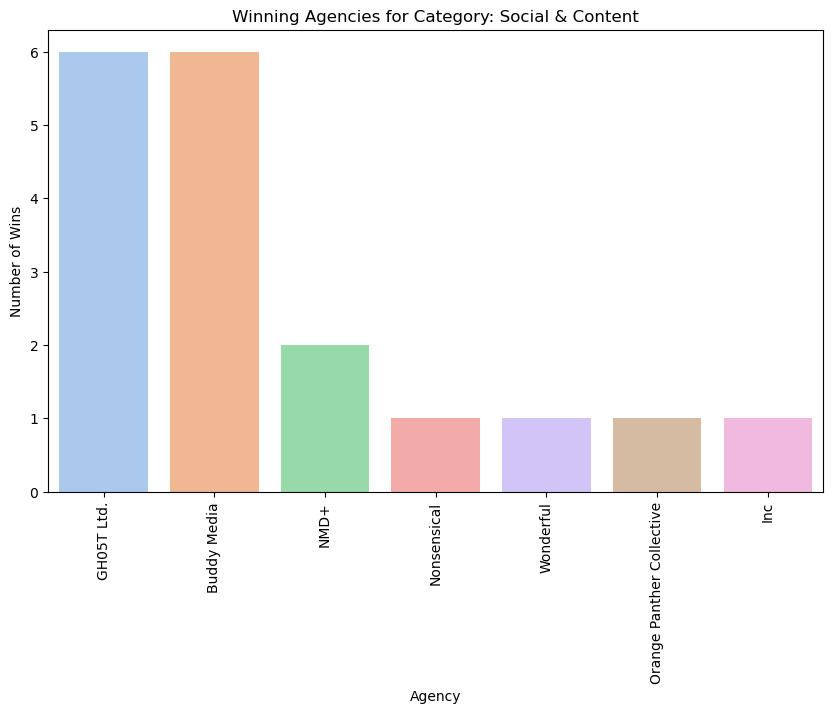

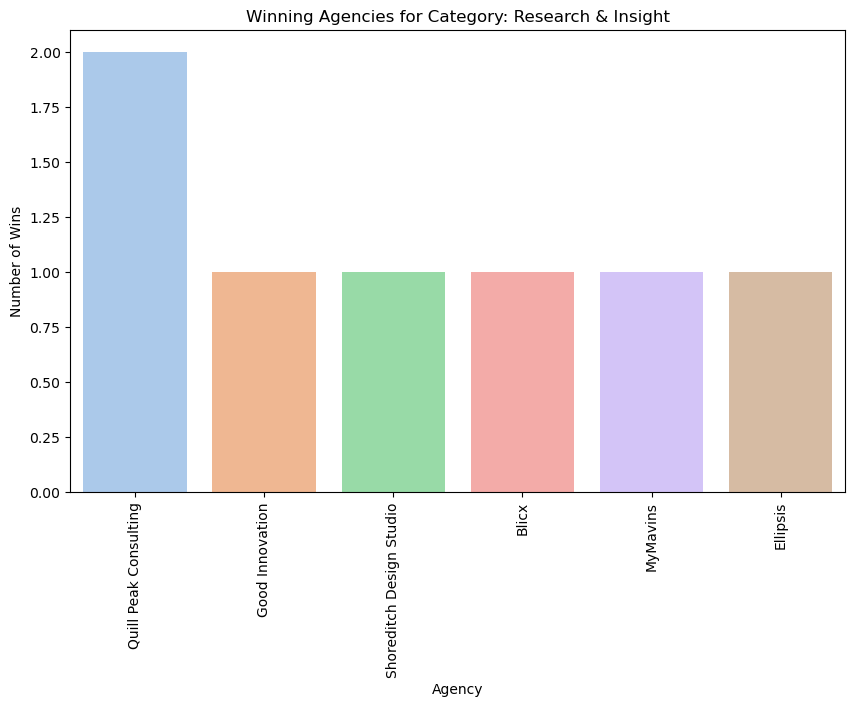

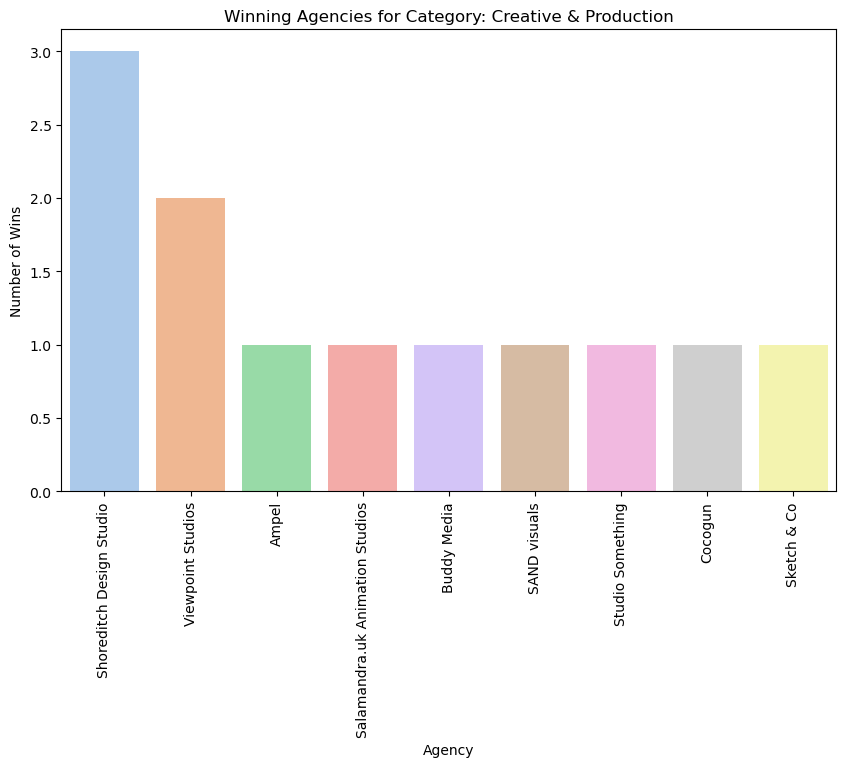

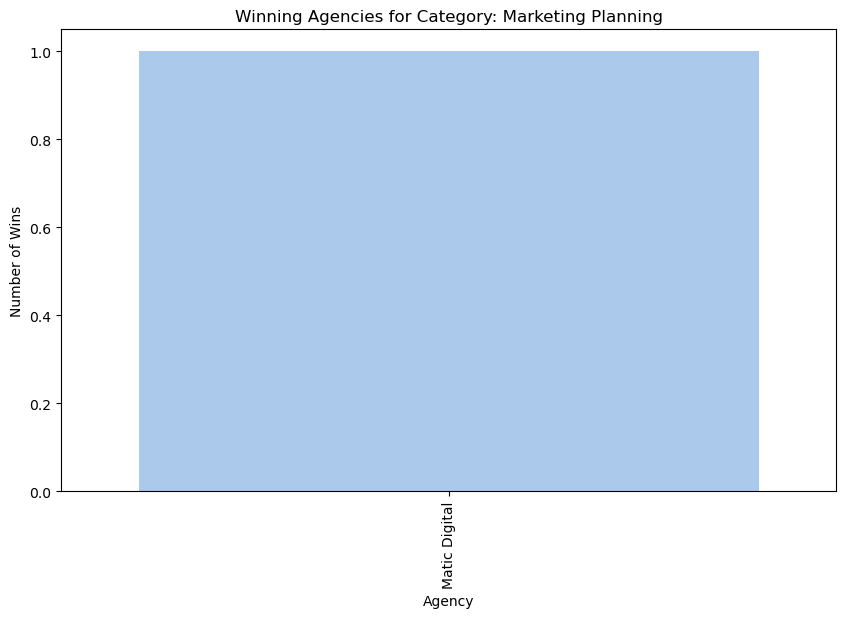

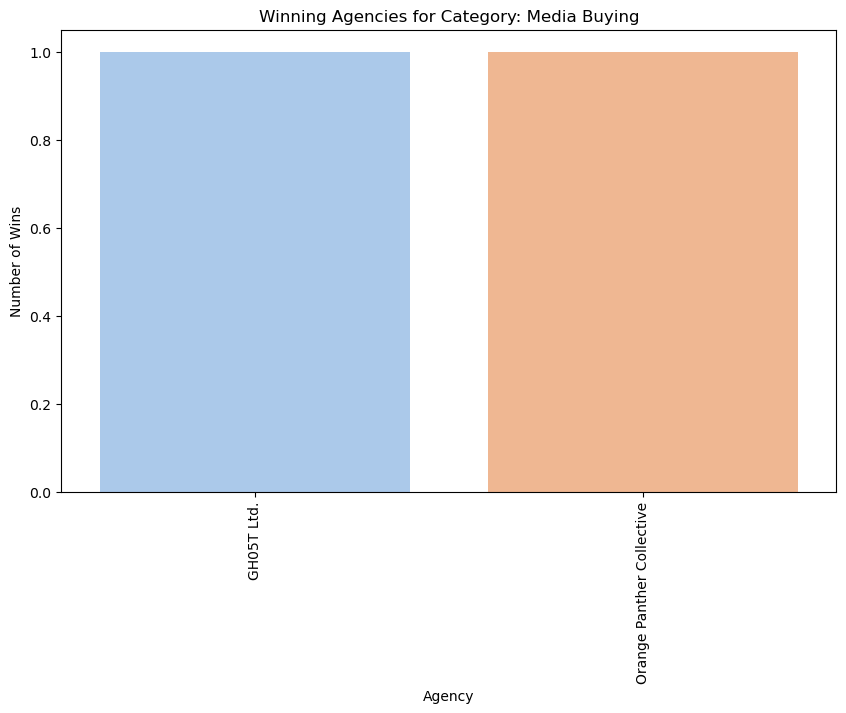

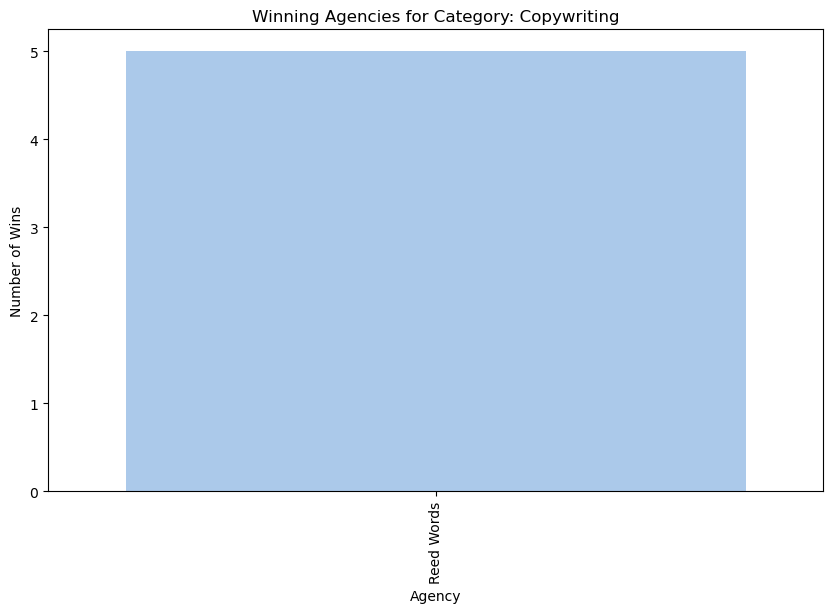

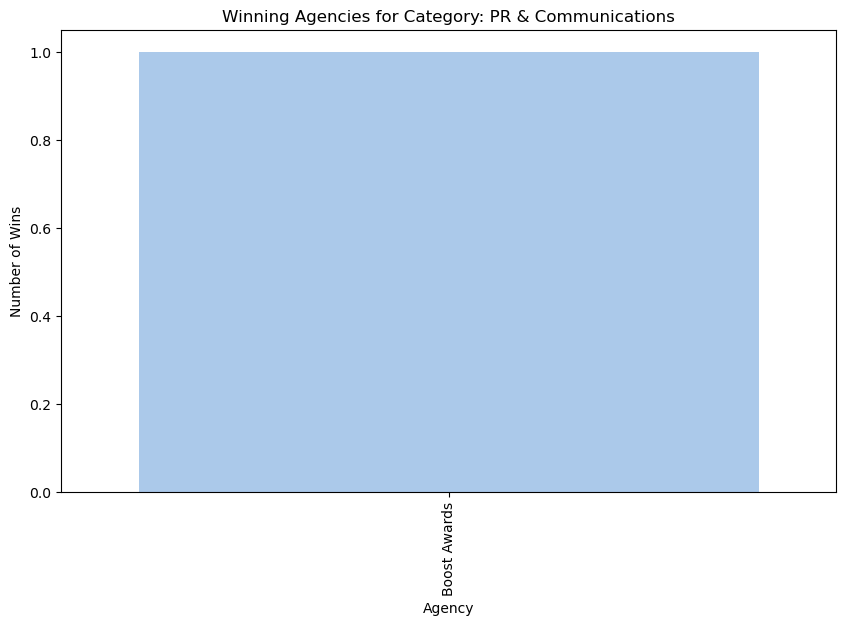

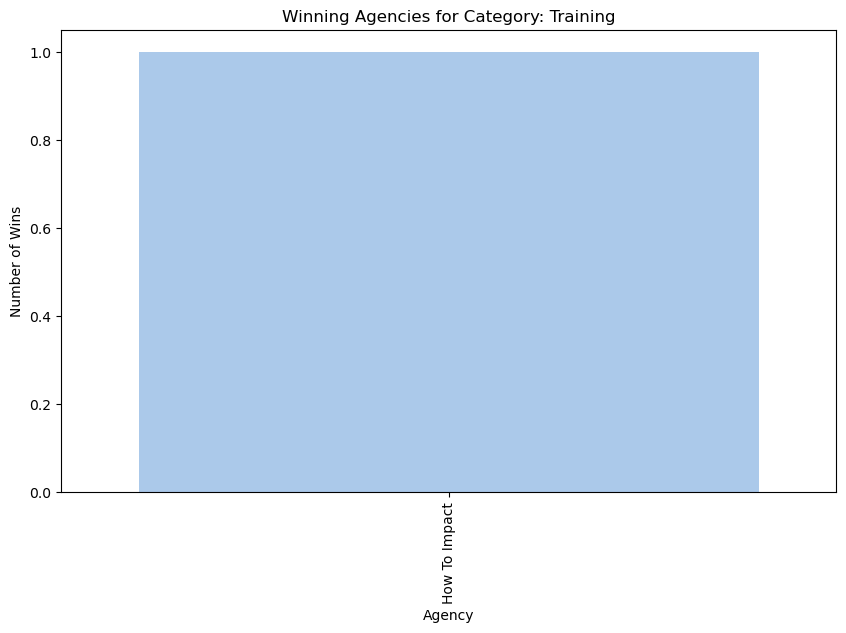

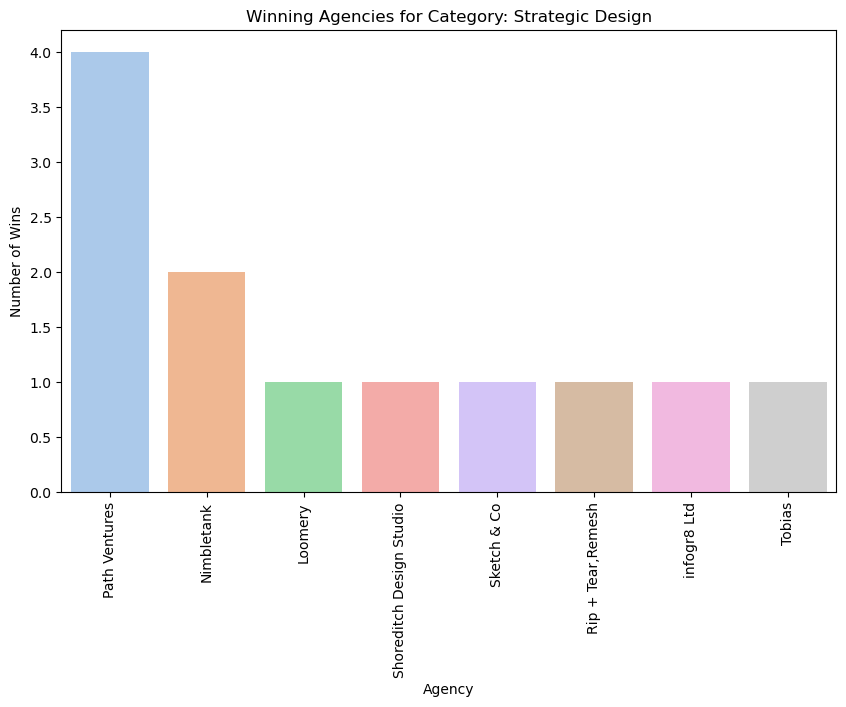

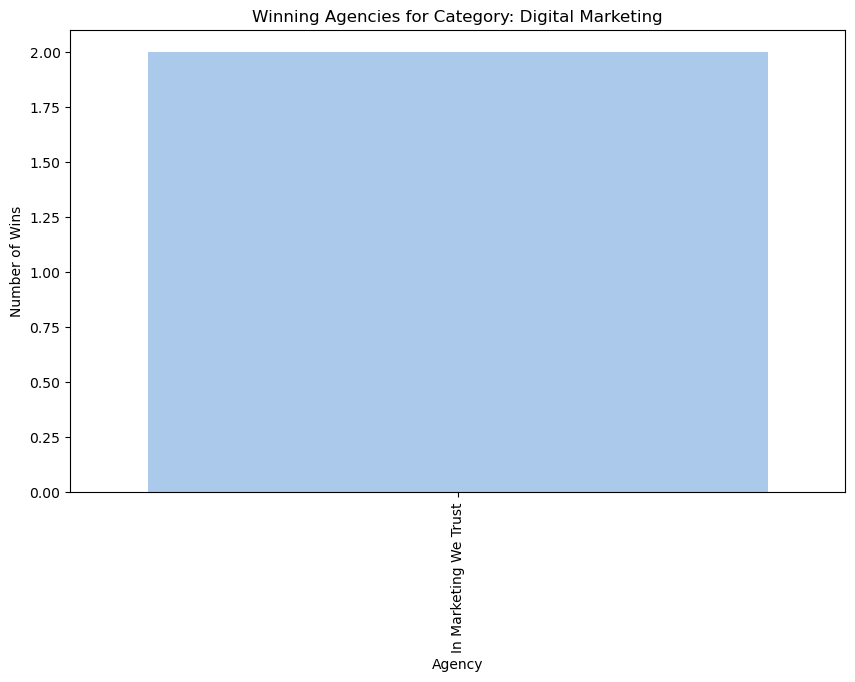

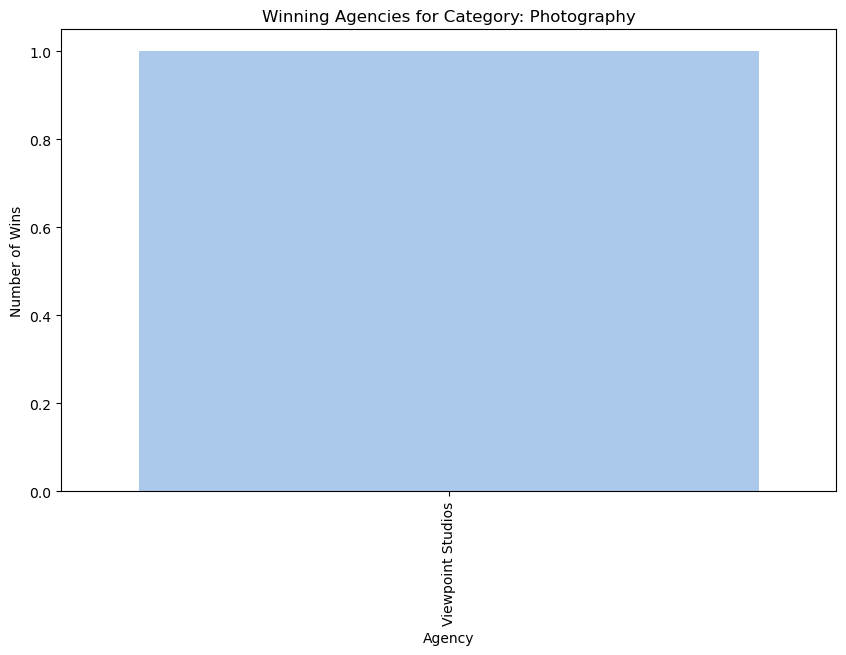

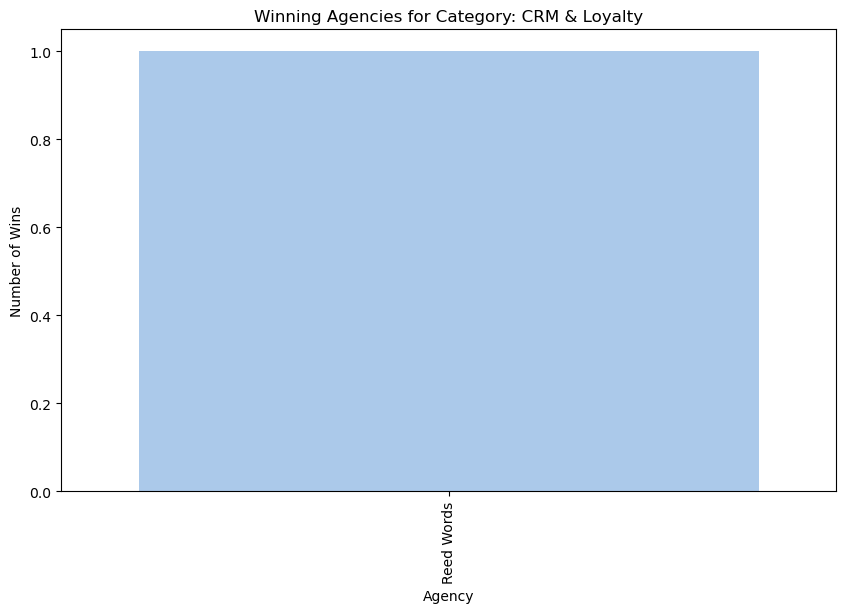

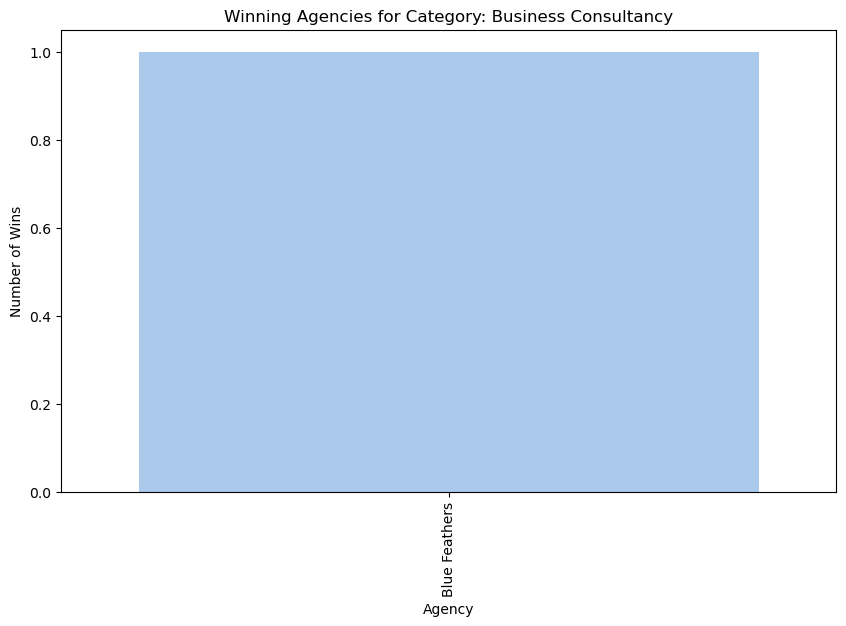

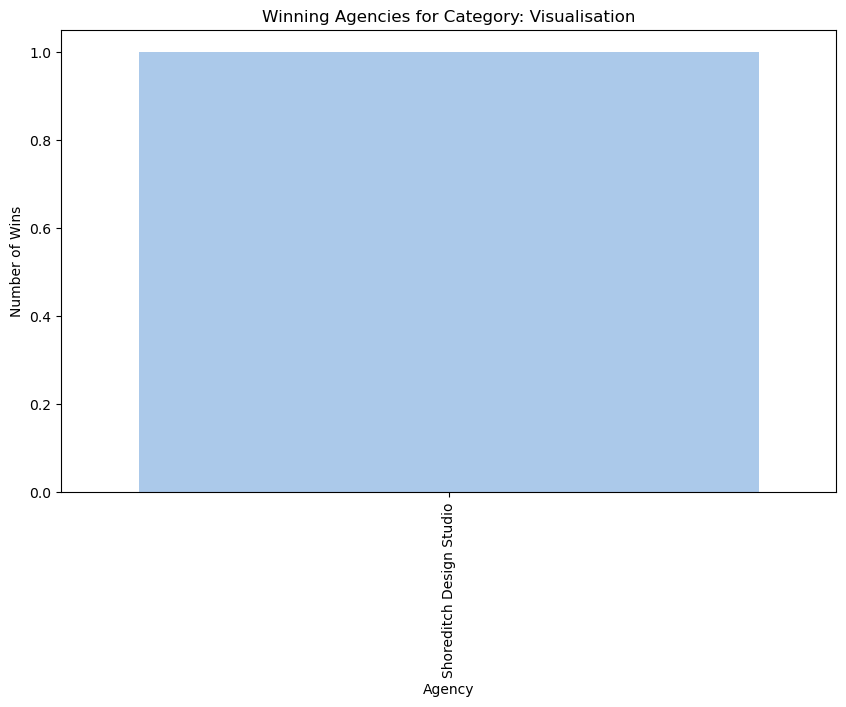

ValueError: min() arg is an empty sequence

<Figure size 1000x600 with 0 Axes>

In [84]:
# Get the unique categories
categories = cb2['Category'].unique()

# For each category
for category in categories:
    # Filter the dataframe for that category
    df_category = cb2[cb2['Category'] == category]
    
    # Count the number of wins for each agency
    agency_wins = df_category['Winning Agency'].value_counts()
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=agency_wins.index, y=agency_wins.values)
    plt.title(f'Winning Agencies for Category: {category}')
    plt.xlabel('Agency')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=90)  # Rotates X-Axis Ticks by 90-degrees
    plt.show()


In [85]:
cb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 170
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brief                 162 non-null    object
 1   Category              159 non-null    object
 2   Clients               162 non-null    object
 3   Status                162 non-null    object
 4   Lead                  162 non-null    object
 5   Level of effort       160 non-null    object
 6   Start date            158 non-null    object
 7   Shortlisted Agencies  162 non-null    object
 8   Winning Agency        120 non-null    object
 9   End date              64 non-null     object
 10  Region                162 non-null    object
 11  Agency 1              162 non-null    object
 12  Agency 2              78 non-null     object
 13  Agency 3              48 non-null     object
 14  Agency 4              6 non-null      object
 15  Agency 5              1 non-null      ob

In [86]:
cb3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brief                  162 non-null    object 
 1   Category               159 non-null    object 
 2   Clients                162 non-null    object 
 3   Status                 162 non-null    object 
 4   Lead                   162 non-null    object 
 5   Level of effort        160 non-null    object 
 6   Start date             158 non-null    object 
 7   Shortlisted Agencies   162 non-null    object 
 8   Winning Agency         120 non-null    object 
 9   End date               64 non-null     object 
 10  Region                 162 non-null    object 
 11  Agency 1               162 non-null    object 
 12  Agency 2               78 non-null     object 
 13  Agency 3               48 non-null     object 
 14  Agency 4               6 non-null      object 
 15  Agency

In [87]:
# Create a new DataFrame cb4 based on cb3
cb4 = cb3.drop(columns=['Level of effort'])  # Remove the 'Level of effort' column
cb4.rename(columns={'Clients': 'Client Name'}, inplace=True)  # Rename 'Clients' to 'Client Name'

### to add random brief tags (for the time being)

In [88]:
# Load tags from .txt file
with open('/project/data/StudiospaceTags.txt', 'r') as file:
    tags = file.read().splitlines()

# Randomly assign multiple tags
random_tags = []
for _ in range(len(cb4)):
    num_tags = random.randint(1, 3)  # Randomly choose the number of tags per brief (between 1 and 3)
    selected_tags = random.sample(tags, num_tags)  # Randomly select tags without replacement
    random_tags.append(', '.join(selected_tags))  # Join selected tags into a single string

# Assign the randomly allocated tags to the dataset
cb4['Tags'] = random_tags
cb4

,Brief,Category,Client Name,Status,Lead,Start date,Shortlisted Agencies,Winning Agency,End date,Region,Agency 1,Agency 2,Agency 3,Agency 4,Agency 5,Agency 6,Agency Count,Client_WA_Interaction,Tags
0,Biffa Corporate Event Support,Spatial & Event Design,Biffa,Matching,Hannah Fraser,5/6/2023,"Innovate Live,Experience,The Park",NaN,NaN,UK,Innovate Live,Experience,The Park,None,None,None,3,NaN,MarTech Implementation
1,3 Yr OneApp UX/UI Deal,UX/UI Design,JLR,Matching,Hannah Fraser,1/8/2023,The Bang,NaN,NaN,UK,The Bang,None,None,None,None,None,1,NaN,Editing
2,Project Trident,UX/UI Design,Phoenix,Matching,Peter Sayburn,29/5/2023,"xDesign,Shoreditch Design Studio",NaN,NaN,UK,xDesign,Shoreditch Design Studio,None,None,None,None,2,NaN,"Customer Strategy, Brand Strategy, Employee Ex..."
3,UX Design System,UX/UI Design,Phoenix,Matching,Peter Sayburn,12/6/2023,xDesign,NaN,NaN,UK,xDesign,None,None,None,None,None,1,NaN,Recruitment Campaigns
4,Brand Refresh,Brand Strategy,Auspaynet,Matching,Kate Walker,3/7/2023,"Cocogun,Houston Group,Principals",Houston Group,NaN,AUS,Cocogun,Houston Group,Principals,None,None,None,3,1.0,"Customer Strategy, MarTech Consulting, Loyalty..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Escape Travel eDM Build,CRM & Loyalty,News Corp (Aus),Finished,Kate Walker,04/10/2022,Apparent,NaN,NaN,AUS,Apparent,None,None,None,None,None,1,NaN,"Service Design, Quantitative Research, TV Prod..."
158,Brand Escape Room Production,Brand Strategy,Aviva,Archived,Paul Bowman,23/01/2023,Innovate Live,Innovate Live,23/02/2023,UK,Innovate Live,None,None,None,None,None,1,5.0,"Media Buying, Proposition Design, Photography"
159,Cover Sense ph2 (UX),UX/UI Design,TAL,Archived,Robin Scarborough,01/02/2022,CS UX,Studiospace,NaN,AUS,CS UX,None,None,None,None,None,1,1.0,"CRM Strategy, Brand Strategy"
160,FIFA website,UX/UI Design,Gala Games,Brief Abandoned,Gideon Hyde,31/10/2022,"Studiomade, Shoreditch Design Studio, Off Brand",NaN,NaN,UK,Studiomade,Shoreditch Design Studio,Off Brand,None,None,None,3,NaN,"Experiential Marketing, Illustration"


In [89]:
# # Save the cb4 DataFrame as a CSV file
cb4.to_csv("cb4.csv", index=False)